In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import datetime
import seaborn as sns
#matplotlib inline
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [104]:
# df1 = pd.read_csv('data/fj14.csv')
df1 = pd.read_csv('data/159.csv')
df1.head(5)

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g),湿度表征量
0,2019,第四轮牧后,轻牧（3天）,2019.9.18,大针茅,PB,G6,1,20.0,NaN,11.0,8.0,8.0,83.19,46.05,37.14
1,2019,第四轮牧后,轻牧（3天）,2019.9.18,羊草,PR,G6,1,12.0,NaN,13.0,NaN,NaN,2.44,1.33,1.11
2,2019,第四轮牧后,轻牧（3天）,2019.9.18,知母,PF,G6,1,2.0,NaN,16.0,NaN,NaN,1.11,0.43,0.68
3,2019,第四轮牧后,轻牧（3天）,2019.9.18,糙隐子草,PB,G6,1,3.0,NaN,8.0,4.0,5.0,10.88,6.45,4.43
4,2019,第四轮牧后,轻牧（3天）,2019.9.18,蒙古葱,PF,G6,1,13.0,NaN,3.0,NaN,NaN,1.57,0.80,0.77


In [9]:
#fig,axes=plt.subplots(1,2,figsize=(36,12))#设置hue参数，对x轴的数据进行细分
#sns.barplot(x='year',y='SOC土壤有机碳', palette="Set2",hue='放牧小区（plot）',data=df1,ax=axes[0])
#sns.barplot(x='year',y='SIC土壤无机碳', palette="Set2",hue='放牧小区（plot）',data=df1,ax=axes[1])
#plt.savefig('a.jpg')

In [10]:
# fig,axes=plt.subplots(2,2,dpi=500,figsize=(36,24))                     
# sns.boxenplot(x='year',y='SOC土壤有机碳',hue='放牧小区（plot）',data=df1, palette="Set2",ax=axes[0][0])
# #palette参数可设置调色板
# sns.boxenplot(x='year',y='SIC土壤无机碳',hue='放牧小区（plot）',data=df1, palette="Set2",ax=axes[0][1])
# sns.boxenplot(x='year',y='全氮N',hue='放牧小区（plot）',data=df1, palette="Set2",ax=axes[1][0])
# sns.boxenplot(x='year',y='土壤C/N比',hue='放牧小区（plot）',data=df1, palette="Set2",ax=axes[1][1] )
# plt.savefig('b.jpg',dpi=500,bbox_inches='tight')

In [11]:
df1

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g),湿度表征量
0,2019,第四轮牧后,轻牧（3天）,2019.9.18,大针茅,PB,G6,1,20.0,NaN,11.0,8.0,8.0,83.19,46.05,37.14
1,2019,第四轮牧后,轻牧（3天）,2019.9.18,羊草,PR,G6,1,12.0,NaN,13.0,NaN,NaN,2.44,1.33,1.11
2,2019,第四轮牧后,轻牧（3天）,2019.9.18,知母,PF,G6,1,2.0,NaN,16.0,NaN,NaN,1.11,0.43,0.68
3,2019,第四轮牧后,轻牧（3天）,2019.9.18,糙隐子草,PB,G6,1,3.0,NaN,8.0,4.0,5.0,10.88,6.45,4.43
4,2019,第四轮牧后,轻牧（3天）,2019.9.18,蒙古葱,PF,G6,1,13.0,NaN,3.0,NaN,NaN,1.57,0.80,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2016,第四轮牧后,无牧（0天）,2016.9.21,米氏冰草,PR,G21,4,30.0,NaN,64.0,NaN,NaN,100.97,62.43,38.54
1676,2016,第四轮牧后,无牧（0天）,2016.9.21,羊草,PR,G21,5,57.0,NaN,150.0,NaN,NaN,155.52,90.01,65.51
1677,2016,第四轮牧后,无牧（0天）,2016.9.21,大针茅,PB,G21,5,50.0,70.0,8.0,4.0,4.0,45.55,29.93,15.62
1678,2016,第四轮牧后,无牧（0天）,2016.9.21,知母,PF,G21,5,34.0,NaN,25.0,NaN,NaN,47.21,18.87,28.34


In [12]:
dfG = df1[df1['放牧小区Block'] == 'G6']

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,2012,G17,NG,13.975000,10.950000,24.925000,1.660000,16.010000
1,2014,G17,NG,13.745000,11.100000,24.845000,1.645000,15.825000
2,2016,G17,NG,15.676667,7.983333,23.660000,1.813333,14.103333
3,2018,G17,NG,15.763333,7.833333,23.596667,1.970000,12.856667
4,2020,G17,NG,16.860000,6.090000,22.950000,2.120000,10.850000
5,2012,G19,NG,14.920000,11.040000,25.960000,1.430000,18.990000
6,2014,G19,NG,15.735000,7.500000,23.235000,1.700000,14.100000
7,2016,G19,NG,14.620000,6.676667,21.293333,1.803333,12.603333
8,2018,G19,NG,17.110000,5.566667,22.676667,2.016667,11.786667
9,2020,G19,NG,17.300000,4.300000,21.600000,2.200000,9.830000


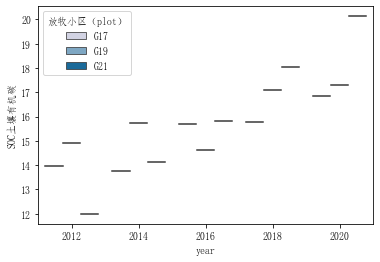

In [13]:
dfNG = pd.read_csv('data/NG.csv')
sns.boxenplot(x='year',y='SOC土壤有机碳',hue='放牧小区（plot）',palette="PuBu",data=dfNG)
dfNG

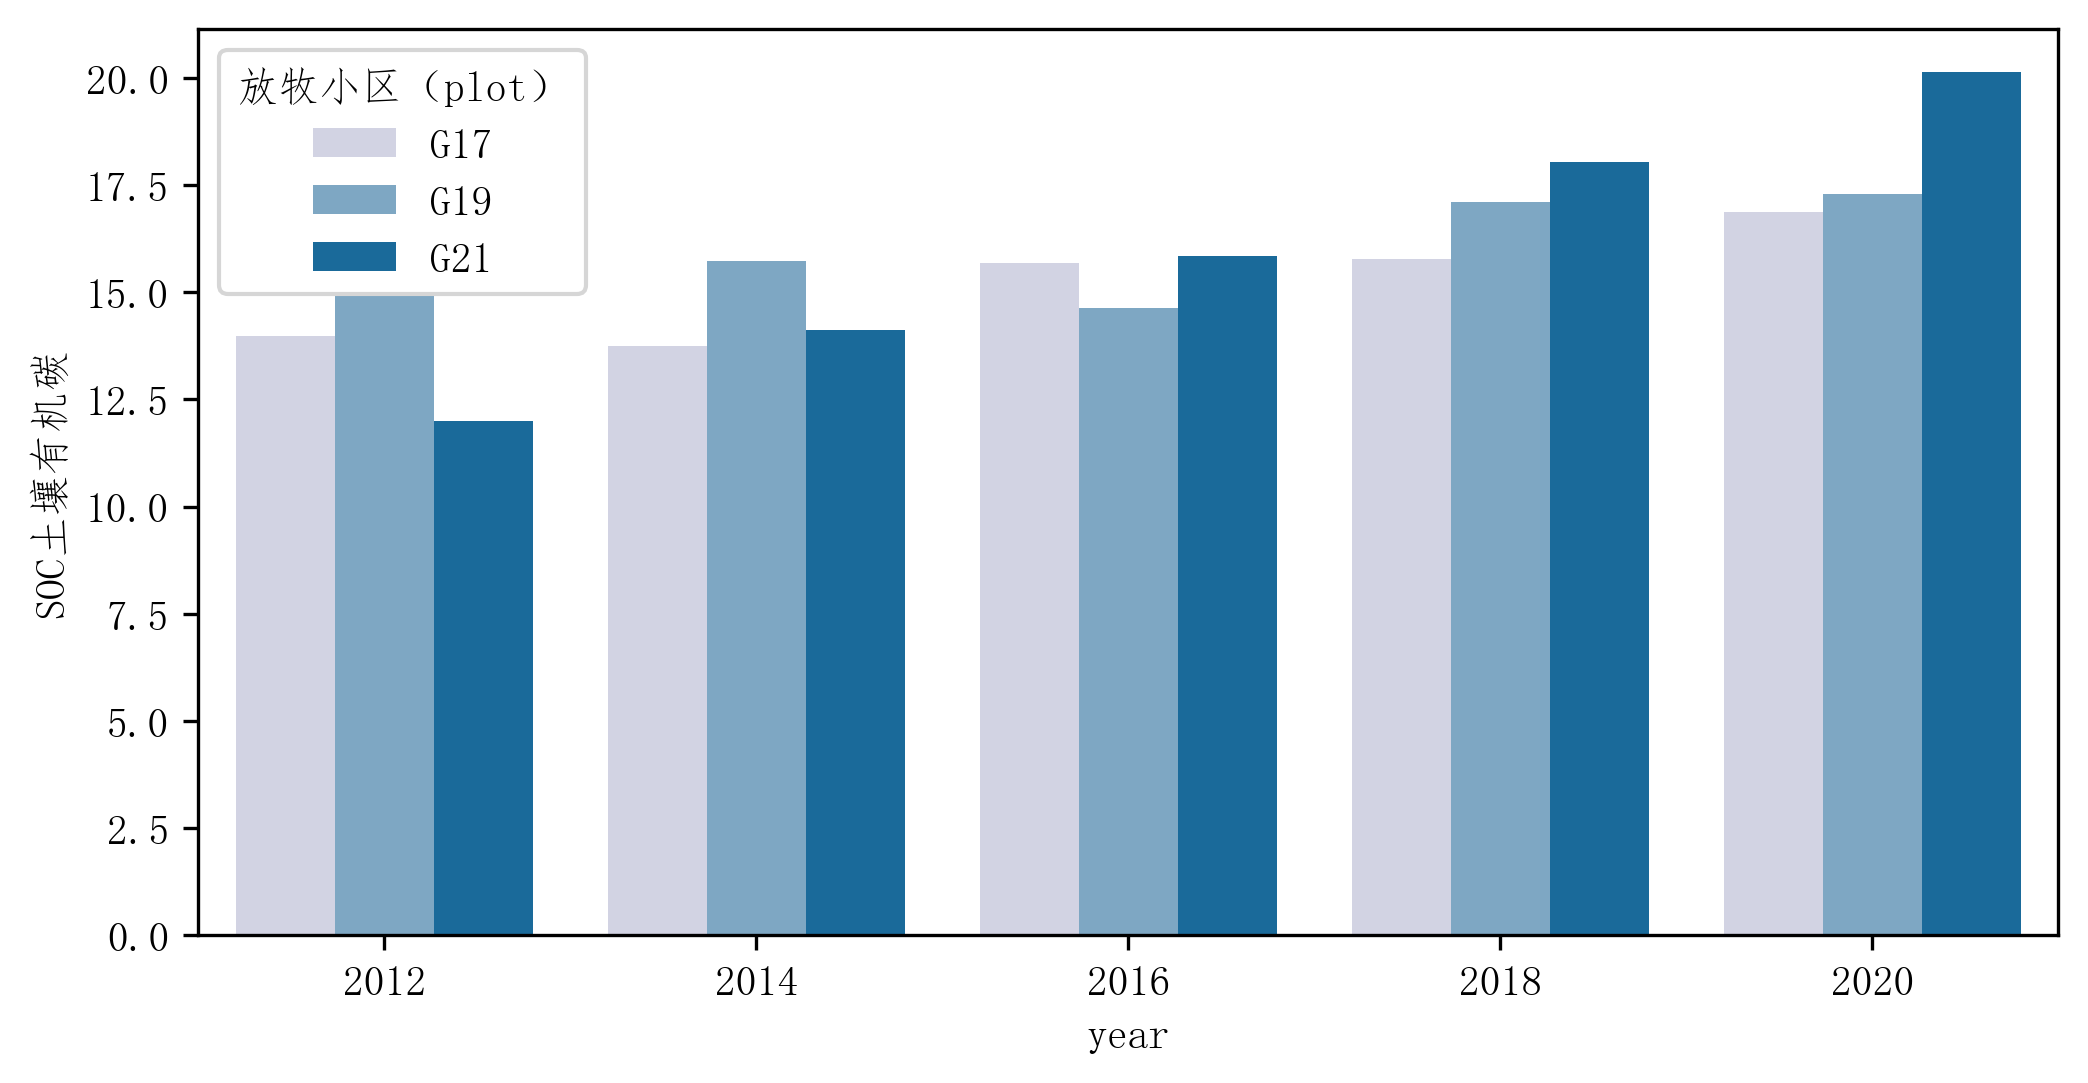

In [14]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SOC土壤有机碳',hue='放牧小区（plot）',palette="PuBu",data=dfNG)
# plt.savefig('ng1.jpg',dpi=500,bbox_inches='tight')

In [15]:
def GM11(x, n):
    '''
    灰色预测
    x：序列，numpy对象
    n:需要往后预测的个数
    '''
    x1 = x.cumsum()  # 一次累加
    z1 = (x1[:len(x1) - 1] + x1[1:]) / 2.0  # 紧邻均值
    z1 = z1.reshape((len(z1), 1))
    B = np.append(-z1, np.ones_like(z1), axis=1)
    Y = x[1:].reshape((len(x) - 1, 1))
    # a为发展系数 b为灰色作用量
    [[a], [b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Y)  # 计算参数
    result = (x[0] - b / a) * np.exp(-a * (n - 1)) - (x[0] - b / a) * np.exp(-a * (n - 2))
    S1_2 = x.var()  # 原序列方差
    e = list()  # 残差序列
    for index in range(1, x.shape[0] + 1):
        predict = (x[0] - b / a) * np.exp(-a * (index - 1)) - (x[0] - b / a) * np.exp(-a * (index - 2))
        e.append(x[index - 1] - predict)
    S2_2 = np.array(e).var()  # 残差方差
    C = S2_2 / S1_2  # 后验差比
    if C <= 0.35:
        assess = '后验差比<=0.35，模型精度等级为好'
    elif C <= 0.5:
        assess = '后验差比<=0.5，模型精度等级为合格'
    elif C <= 0.65:
        assess = '后验差比<=0.65，模型精度等级为勉强'
    else:
        assess = '后验差比>0.65，模型精度等级为不合格'
    # 预测数据
    predict = list()
    for index in range(x.shape[0] + 1, x.shape[0] + n + 1):
        predict.append((x[0] - b / a) * np.exp(-a * (index - 1)) - (x[0] - b / a) * np.exp(-a * (index - 2)))
    predict = np.array(predict)
    return {
        'a': {'value': a, 'desc': '发展系数'},
        'b': {'value': b, 'desc': '灰色作用量'},
        'predict': {'value': result, 'desc': '第%d个预测值' % n},
        'C': {'value': C, 'desc': assess},
        'predict': {'value': predict, 'desc': '往后预测%d个的序列' % (n)},
    }

In [ ]:
dfHGI = pd.read_csv(r"C:\Users\96212\Desktop\draw.csv")
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='区域',y='2023年全氮N',hue='放牧小区',palette="autumn_r",data=dfHGI)

In [109]:
dfHGI

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,2012,G9,HGI,13.470000,11.875000,25.345000,1.650000,17.020000
1,2014,G9,HGI,12.735000,9.600000,22.335000,1.375000,16.695000
2,2016,G9,HGI,14.500000,7.783333,22.283333,1.836667,12.800000
3,2018,G9,HGI,15.856667,4.700000,20.556667,1.976667,10.670000
4,2020,G9,HGI,17.200000,3.120000,20.320000,2.240000,9.080000
5,2012,G13,HGI,12.160000,11.550000,23.710000,1.375000,17.390000
6,2014,G13,HGI,12.925000,8.125000,21.050000,1.660000,13.350000
7,2016,G13,HGI,15.970000,5.333333,21.303333,1.883333,11.843333
8,2018,G13,HGI,15.030000,5.650000,20.680000,1.903333,11.250000
9,2020,G13,HGI,16.690000,3.560000,20.260000,2.100000,9.630000


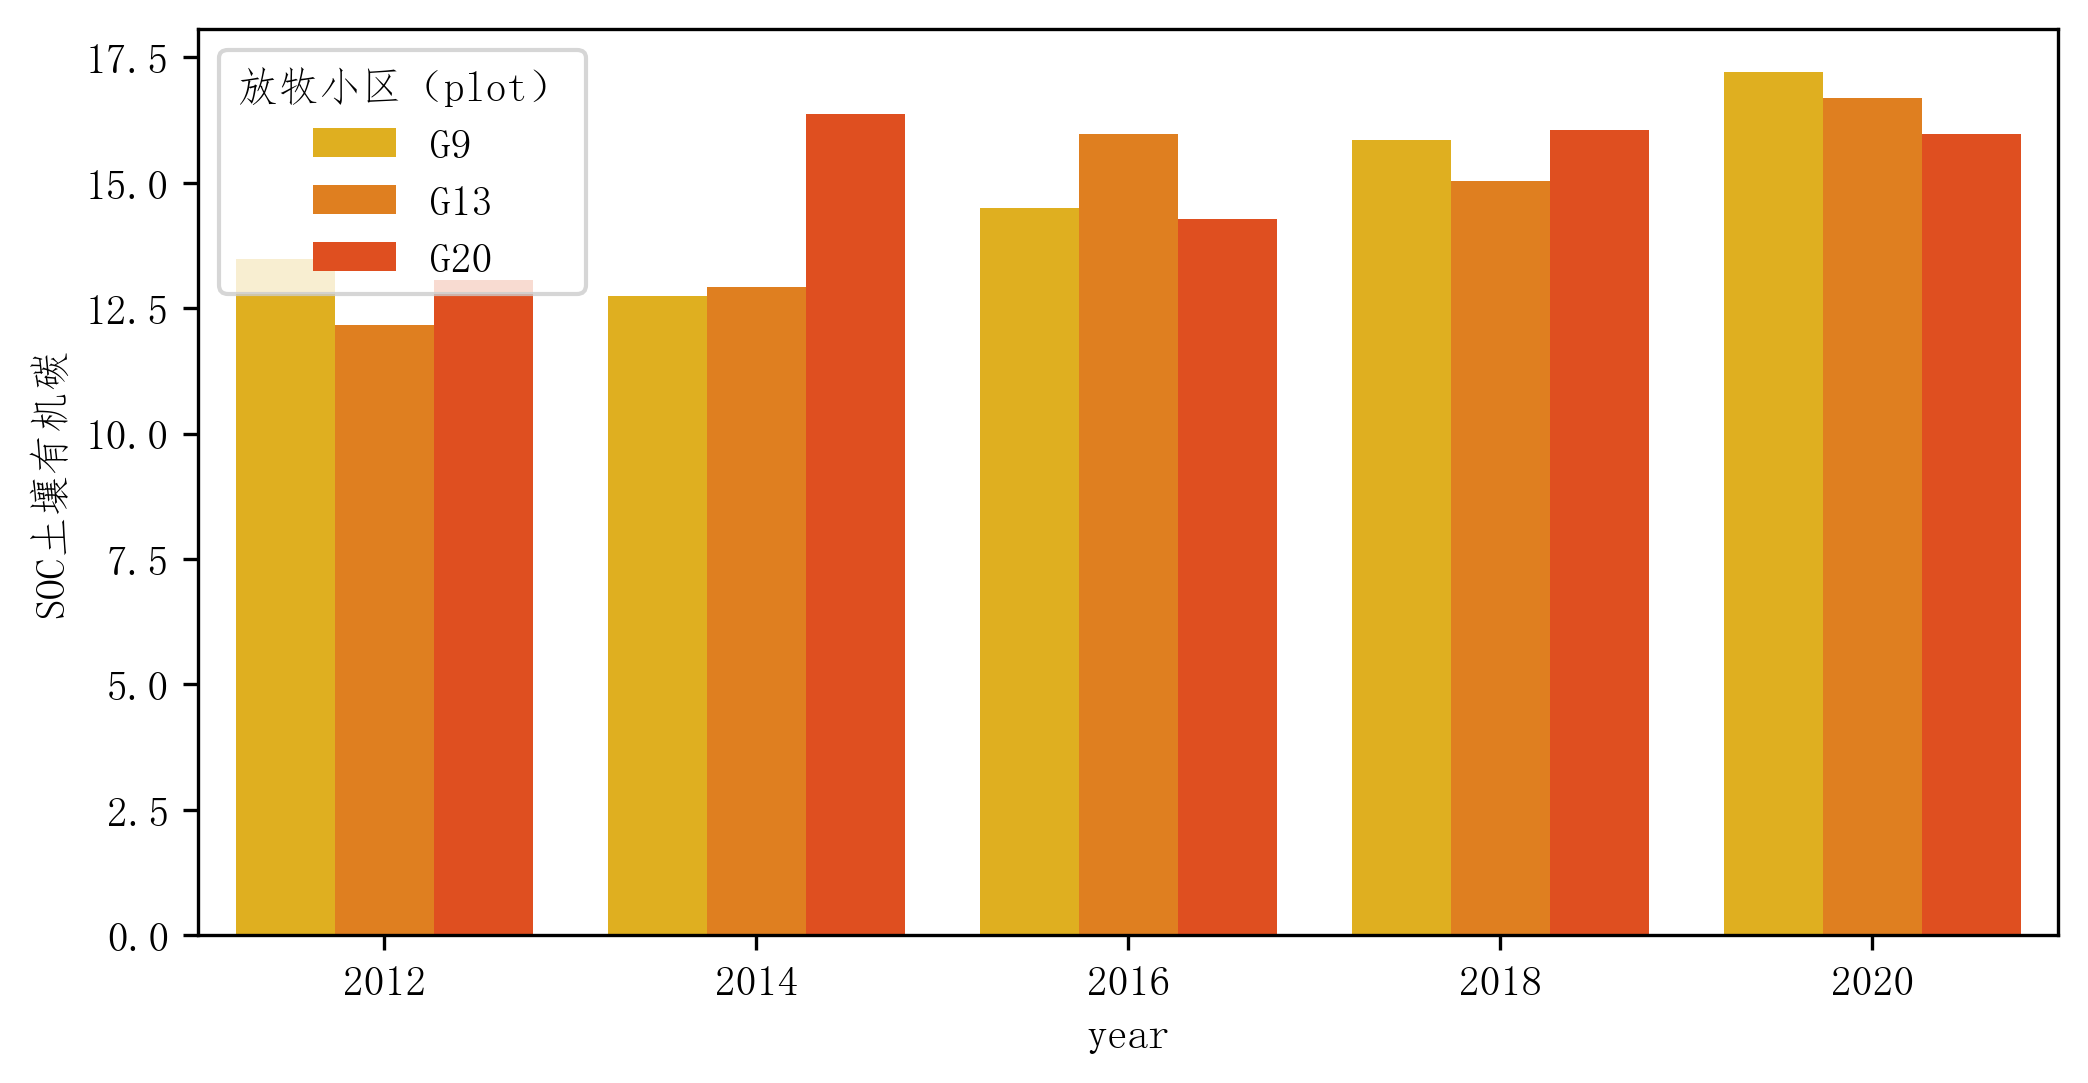

In [16]:
dfHGI = pd.read_csv('data/HGI.csv')
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SOC土壤有机碳',hue='放牧小区（plot）',palette="autumn_r",data=dfHGI)
# plt.savefig('hg1.jpg',dpi=500,bbox_inches='tight')

In [71]:
df1

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,2012,G17,NG,17.05,11.30,28.35,2.19,12.93
1,2012,G19,NG,19.53,11.33,30.86,1.88,16.39
2,2012,G21,NG,14.55,9.60,24.15,1.87,13.82
3,2012,G6,LGI,18.67,12.67,31.34,2.41,12.16
4,2012,G12,LGI,13.90,8.13,22.04,1.93,11.40
...,...,...,...,...,...,...,...,...
127,2020,G11,MGI,14.74,3.35,18.10,1.96,9.23
128,2020,G16,MGI,14.78,9.82,24.60,1.71,14.36
129,2020,G9,HGI,17.20,3.12,20.32,2.24,9.08
130,2020,G13,HGI,16.69,3.56,20.26,2.10,9.63


In [ ]:
# dfG17=dfMGI[dfMGI['放牧小区（plot）']==i]
# dfG171=np.array(dfG17['全氮N'])

In [97]:
area = {
    'NG':['G17', 'G19', 'G21'],
    'LGI':['G6', 'G12', 'G18'],
    'MGl':['G8', 'G11', 'G16'],
    'HGI':['G9', 'G13', 'G20'],
}

In [102]:
dfMGI = pd.read_csv('data/HGI.csv')

In [103]:
for i in area['HGI']:
    dfG17=dfMGI[dfMGI['放牧小区（plot）']==i]
    print(dfG17)
    # dfG171=np.array(dfG17['全氮N'])
dfG17

   year 放牧小区（plot） 放牧强度（intensity）   SOC土壤有机碳   SIC土壤无机碳    STC土壤全碳       全氮N  \
0  2012         G9             HGI  13.470000  11.875000  25.345000  1.650000   
1  2014         G9             HGI  12.735000   9.600000  22.335000  1.375000   
2  2016         G9             HGI  14.500000   7.783333  22.283333  1.836667   
3  2018         G9             HGI  15.856667   4.700000  20.556667  1.976667   
4  2020         G9             HGI  17.200000   3.120000  20.320000  2.240000   

   土壤C/N比  
0  17.020  
1  16.695  
2  12.800  
3  10.670  
4   9.080  
   year 放牧小区（plot） 放牧强度（intensity）  SOC土壤有机碳   SIC土壤无机碳    STC土壤全碳       全氮N  \
5  2012        G13             HGI    12.160  11.550000  23.710000  1.375000   
6  2014        G13             HGI    12.925   8.125000  21.050000  1.660000   
7  2016        G13             HGI    15.970   5.333333  21.303333  1.883333   
8  2018        G13             HGI    15.030   5.650000  20.680000  1.903333   
9  2020        G13             HGI    16.

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
10,2012,G20,HGI,13.065000,10.850000,23.915000,1.750000,14.245000
11,2014,G20,HGI,16.365000,11.775000,28.140000,1.750000,16.660000
12,2016,G20,HGI,14.283333,7.726667,22.010000,1.920000,12.393333
13,2018,G20,HGI,16.046667,6.466667,22.513333,1.953333,12.076667
14,2020,G20,HGI,15.970000,4.660000,20.630000,2.050000,10.040000


In [17]:
dfG17=dfHGI[dfHGI['放牧小区（plot）']=='G13']
dfG171=np.array(dfG17['土壤C/N比'])
dfG171

array([17.39      , 13.35      , 11.84333333, 11.25      ,  9.63      ])

In [18]:
dfLGI = pd.read_csv('data/LGI.csv')
dfG171=dfLGI[dfLGI['放牧小区（plot）']=='G18']
dfG171=np.array(dfG171['土壤C/N比'])
dfG171

array([13.98      , 15.42      , 13.57      , 13.30666667, 11.75      ])

In [19]:
dfMGI = pd.read_csv('data/MGI.csv')
dfG171=dfMGI[dfMGI['放牧小区（plot）']=='G8']
dfG171=np.array(dfG171['土壤C/N比'])
dfG171

array([13.41      , 13.51      , 11.94666667,  9.56333333,  8.41      ])

In [20]:
dfNG = pd.read_csv('data/NG.csv')
dfG171=dfNG[dfNG['放牧小区（plot）']=='G21']
dfG171=np.array(dfG171['土壤C/N比'])
dfG171

array([15.645     , 14.195     , 12.89      , 11.48666667,  9.95      ])

In [21]:
area = {
    'NG':['G17', 'G19', 'G21'],
    'LGl':['G6', 'G12', 'G18'],
    'MGl':['G8', 'G11', 'G16'],
    'HGl':['G9', 'G13', 'G20'],
}

In [22]:
area['NG']

['G17', 'G19', 'G21']

In [105]:
ll = ['G20', 'G6', 'G8', 'G9', 'G11', 'G12', 'G13', 'G16', 'G17',
       'G18', 'G19', 'G21']

In [24]:
for i in area['MGl']:
    dfG17=dfMGI[dfMGI['放牧小区（plot）']==i]
    dfG171=np.array(dfG17['全氮N'])
    # dfG = df1[df1['放牧小区Block'] == i]
    # dfG = dfG.loc[:,['年份','湿度表征量']]
    # dfNF = dfG.groupby(['年份']).mean()
    # dfG171=np.array(dfNF['湿度表征量'])
    result = GM11(dfG171, 3)
    print(result)

{'a': {'value': -0.04159207882006433, 'desc': '发展系数'}, 'b': {'value': 1.612003564777576, 'desc': '灰色作用量'}, 'predict': {'value': array([2.03221031, 2.11851654, 2.20848813]), 'desc': '往后预测3个的序列'}, 'C': {'value': 0.3292995572568978, 'desc': '后验差比<=0.35，模型精度等级为好'}}
{'a': {'value': -0.04349902873933592, 'desc': '发展系数'}, 'b': {'value': 1.6123257066803476, 'desc': '灰色作用量'}, 'predict': {'value': array([2.05368313, 2.14498778, 2.24035175]), 'desc': '往后预测3个的序列'}, 'C': {'value': 0.30776577417914164, 'desc': '后验差比<=0.35，模型精度等级为好'}}
{'a': {'value': -0.05989139598208332, 'desc': '发展系数'}, 'b': {'value': 1.3079508314028605, 'desc': '灰色作用量'}, 'predict': {'value': array([1.84611718, 1.96006181, 2.08103924]), 'desc': '往后预测3个的序列'}, 'C': {'value': 1.5038782960955916, 'desc': '后验差比>0.65，模型精度等级为不合格'}}


In [ ]:
for i in ll:
    dfG = df1[df1['放牧小区Block'] == i]
    dfG = dfG.loc[:,['年份','湿度表征量']]
    dfNF = dfG.groupby(['年份']).mean()

In [25]:
for i in ll:
    dfG = df1[df1['放牧小区Block'] == i]
    dfG = dfG.loc[:,['年份','湿度表征量']]
    dfNF = dfG.groupby(['年份']).mean()
    dfG171=np.array(dfNF['湿度表征量'])
    result = GM11(dfG171, 3)
    print(result)

{'a': {'value': 0.09231575014940341, 'desc': '发展系数'}, 'b': {'value': 8.019522007729108, 'desc': '灰色作用量'}, 'predict': {'value': array([4.95088644, 4.5143034 , 4.11621948]), 'desc': '往后预测3个的序列'}, 'C': {'value': 1.0303254061077816, 'desc': '后验差比>0.65，模型精度等级为不合格'}}
{'a': {'value': -0.1275731961671654, 'desc': '发展系数'}, 'b': {'value': 6.70178926053628, 'desc': '灰色作用量'}, 'predict': {'value': array([17.82123   , 20.2461295 , 23.00098027]), 'desc': '往后预测3个的序列'}, 'C': {'value': 1.4345029437231336, 'desc': '后验差比>0.65，模型精度等级为不合格'}}
{'a': {'value': -0.17876024788165606, 'desc': '发展系数'}, 'b': {'value': 4.58028330432192, 'desc': '灰色作用量'}, 'predict': {'value': array([15.79425909, 18.88573307, 22.58231371]), 'desc': '往后预测3个的序列'}, 'C': {'value': 1.34515414307078, 'desc': '后验差比>0.65，模型精度等级为不合格'}}
{'a': {'value': 0.18300803446255026, 'desc': '发展系数'}, 'b': {'value': 11.522404310671595, 'desc': '灰色作用量'}, 'predict': {'value': array([4.33727756, 3.61191762, 3.00786581]), 'desc': '往后预测3个的序列'}, 'C': {'value': 0

In [38]:
df1

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g),湿度表征量
0,2019,第四轮牧后,轻牧（3天）,2019.9.18,大针茅,PB,G6,1,20.0,NaN,11.0,8.0,8.0,83.19,46.05,37.14
1,2019,第四轮牧后,轻牧（3天）,2019.9.18,羊草,PR,G6,1,12.0,NaN,13.0,NaN,NaN,2.44,1.33,1.11
2,2019,第四轮牧后,轻牧（3天）,2019.9.18,知母,PF,G6,1,2.0,NaN,16.0,NaN,NaN,1.11,0.43,0.68
3,2019,第四轮牧后,轻牧（3天）,2019.9.18,糙隐子草,PB,G6,1,3.0,NaN,8.0,4.0,5.0,10.88,6.45,4.43
4,2019,第四轮牧后,轻牧（3天）,2019.9.18,蒙古葱,PF,G6,1,13.0,NaN,3.0,NaN,NaN,1.57,0.80,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2016,第四轮牧后,无牧（0天）,2016.9.21,米氏冰草,PR,G21,4,30.0,NaN,64.0,NaN,NaN,100.97,62.43,38.54
1676,2016,第四轮牧后,无牧（0天）,2016.9.21,羊草,PR,G21,5,57.0,NaN,150.0,NaN,NaN,155.52,90.01,65.51
1677,2016,第四轮牧后,无牧（0天）,2016.9.21,大针茅,PB,G21,5,50.0,70.0,8.0,4.0,4.0,45.55,29.93,15.62
1678,2016,第四轮牧后,无牧（0天）,2016.9.21,知母,PF,G21,5,34.0,NaN,25.0,NaN,NaN,47.21,18.87,28.34


In [39]:
dfNF

,湿度表征量
年份,
2016,6.973793
2017,12.718095
2018,3.663846
2019,3.328529
2020,11.932750


In [68]:
dfG = df1[df1['放牧小区Block'] == 'G13']
dfG = dfG.loc[:,['年份','湿度表征量']]
dfNF = dfG.groupby(['年份']).mean()
dfNF

,湿度表征量
年份,
2016,6.973793
2017,12.718095
2018,3.663846
2019,3.328529
2020,11.932750


In [59]:
# dfNF.to_csv('444.csv')

In [61]:
ddd = pd.read_csv(r"444.csv")
# dfG171=dfLGI[dfLGI['放牧小区（plot）']=='G18']
# dfG171=np.array(dfG171['土壤C/N比'])
ddd

,年份,湿度表征量
0,2016,5.649643
1,2017,11.773000
2,2018,0.090000
3,2019,3.880638
4,2020,9.450000
5,2023,4.116200


In [108]:
ddd = pd.read_csv(r"C:\Users\96212\Desktop\draw.csv")
ddd

,区域,xxx,2023年全氮N,2020全氮N,2023年土壤C/N比,2020土壤C/N比,2023年湿度表征量,2020湿度表征量,2023年植被覆盖,2020
0,G20,HGI,2.3798,1.71,6.0367,10.04,4.1162,9.450000,0.6213,NaN
1,G6,LGI,2.4837,2.02,5.1967,8.82,23.0009,17.293333,45.2803,NaN
2,G8,MGI,2.2085,1.94,5.1178,8.41,22.5823,15.197568,16.5016,NaN
3,G9,HGI,3.4951,2.24,4.6645,9.08,3.0079,8.904634,1.0647,NaN
4,G11,MGI,2.2404,1.96,6.1980,9.23,15.2433,12.126667,12.0669,NaN
5,G12,LGI,2.1668,2.26,7.4459,10.28,39.7586,15.792000,36.7253,NaN
6,G13,HGI,2.5850,2.10,7.2382,9.63,6.1490,11.932750,3.6241,NaN
7,G16,MGI,2.0810,1.71,11.7925,14.36,54.0202,18.478000,61.1935,NaN
8,G17,NG,2.7345,2.12,7.7460,10.85,96.9015,27.890714,95.7281,NaN
9,G18,LGI,2.9538,2.05,9.2256,11.75,72.2690,18.438485,70.6547,NaN


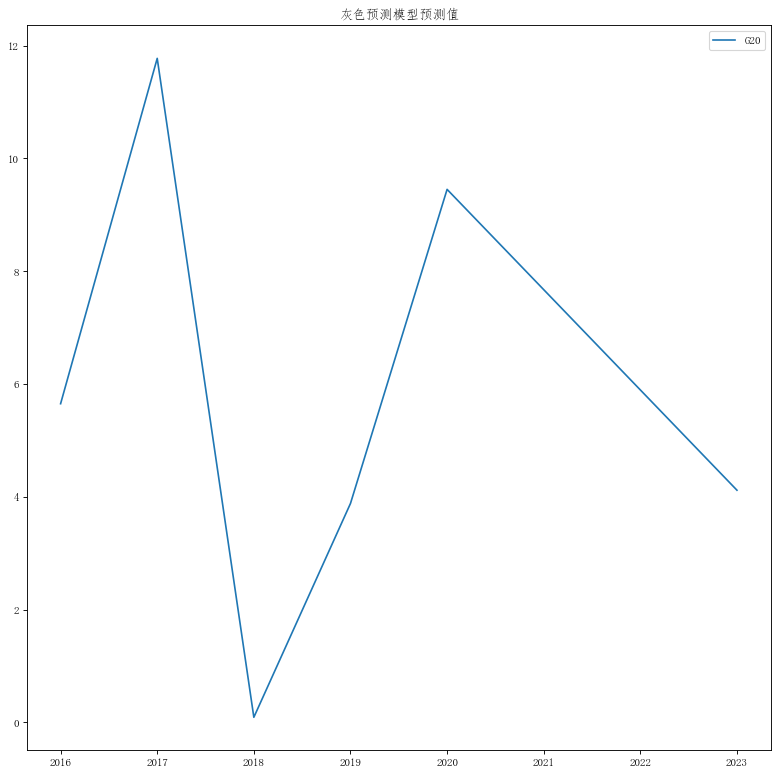

In [67]:
plt.figure(figsize=(12, 12),dpi=80)

# ax1 = fig.add_axes([0.1,0.1,0.4,0.8]) 
# plt.subplot(2,2,1)  #创建两行两列的子图，并绘制第一个子图
plt.plot(ddd['年份'], ddd['湿度表征量'],)
# plt.plot(np.arange(len(Y10_train_pred)), Y10_train_pred, '-o')
plt.title('灰色预测模型预测值')
# plt.axis(xmin=-2*np.pi, xmax=2*np.pi, ymin=-1, ymax=1)  # 在axes1中设置x轴和y轴显示范围
plt.legend(['G20'])

In [52]:
df1

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g),湿度表征量
0,2019,第四轮牧后,轻牧（3天）,2019.9.18,大针茅,PB,G6,1,20.0,NaN,11.0,8.0,8.0,83.19,46.05,37.14
1,2019,第四轮牧后,轻牧（3天）,2019.9.18,羊草,PR,G6,1,12.0,NaN,13.0,NaN,NaN,2.44,1.33,1.11
2,2019,第四轮牧后,轻牧（3天）,2019.9.18,知母,PF,G6,1,2.0,NaN,16.0,NaN,NaN,1.11,0.43,0.68
3,2019,第四轮牧后,轻牧（3天）,2019.9.18,糙隐子草,PB,G6,1,3.0,NaN,8.0,4.0,5.0,10.88,6.45,4.43
4,2019,第四轮牧后,轻牧（3天）,2019.9.18,蒙古葱,PF,G6,1,13.0,NaN,3.0,NaN,NaN,1.57,0.80,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2016,第四轮牧后,无牧（0天）,2016.9.21,米氏冰草,PR,G21,4,30.0,NaN,64.0,NaN,NaN,100.97,62.43,38.54
1676,2016,第四轮牧后,无牧（0天）,2016.9.21,羊草,PR,G21,5,57.0,NaN,150.0,NaN,NaN,155.52,90.01,65.51
1677,2016,第四轮牧后,无牧（0天）,2016.9.21,大针茅,PB,G21,5,50.0,70.0,8.0,4.0,4.0,45.55,29.93,15.62
1678,2016,第四轮牧后,无牧（0天）,2016.9.21,知母,PF,G21,5,34.0,NaN,25.0,NaN,NaN,47.21,18.87,28.34


In [26]:
dfG = df1[df1['放牧小区Block'] == 'G16']
dfG = dfG.loc[:,['年份','湿度表征量']]
dfNF = dfG.groupby(['年份']).mean()
# dfG171=np.array(dfNF['湿度表征量'])
# dfG171

array([ 6.9737931 , 12.71809524,  3.66384615,  3.32852941, 11.93275   ])

In [ ]:
dfG171=np.array(dfNF['湿度表征量'])
dfG171

In [27]:
dfG = df1[df1['放牧小区Block'] == 'G13']
dfG = dfG.loc[:,['年份','湿度表征量']]
dfNF = dfG.groupby(['年份']).mean()
dfG171=np.array(dfNF['湿度表征量'])
result = GM11(dfG171, 3)
print(result)

{'a': {'value': 0.05522070564398396, 'desc': '发展系数'}, 'b': {'value': 9.188160765650764, 'desc': '灰色作用量'}, 'predict': {'value': array([6.86704309, 6.49811996, 6.14901676]), 'desc': '往后预测3个的序列'}, 'C': {'value': 1.0270983663136497, 'desc': '后验差比>0.65，模型精度等级为不合格'}}


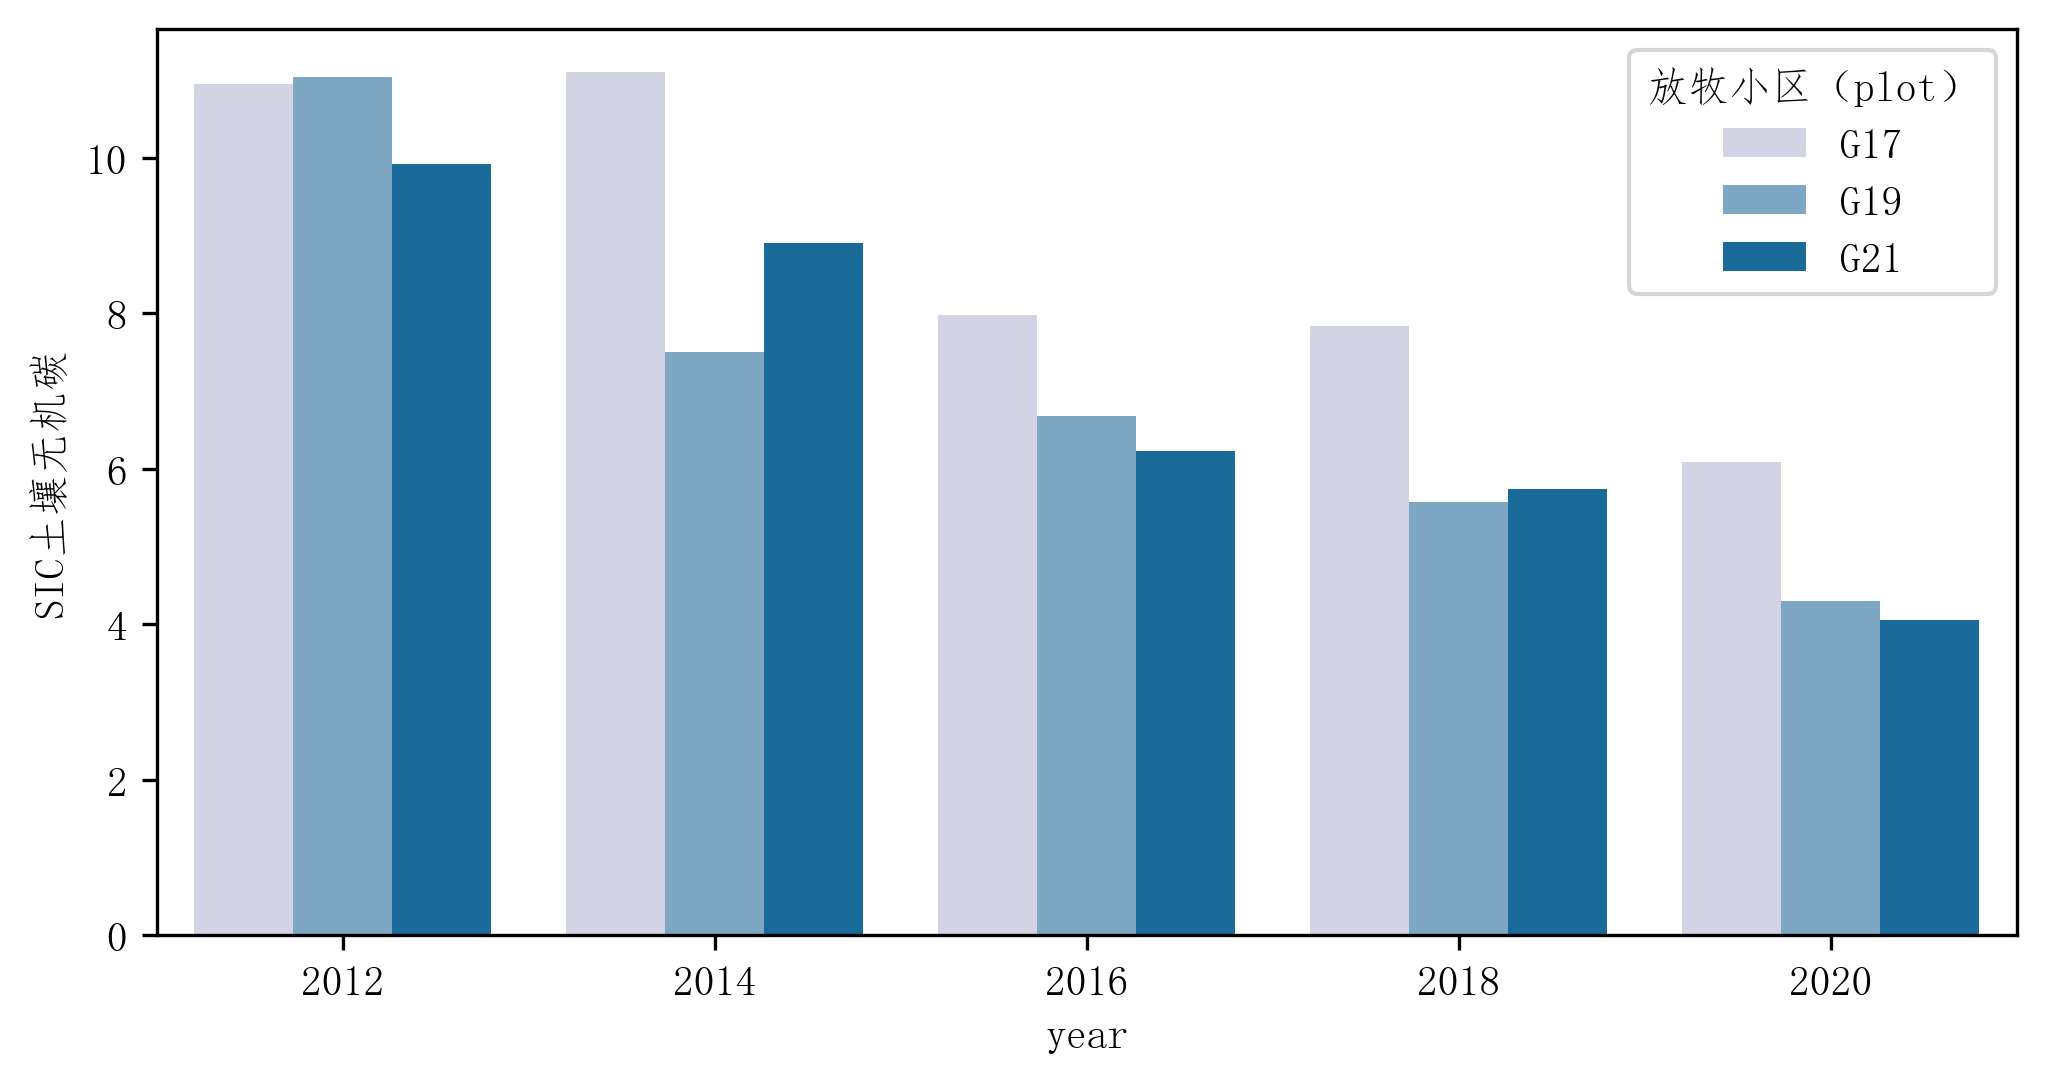

In [28]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SIC土壤无机碳',hue='放牧小区（plot）',palette="PuBu",data=dfNG)
# plt.savefig('ng2.jpg',dpi=500,bbox_inches='tight')

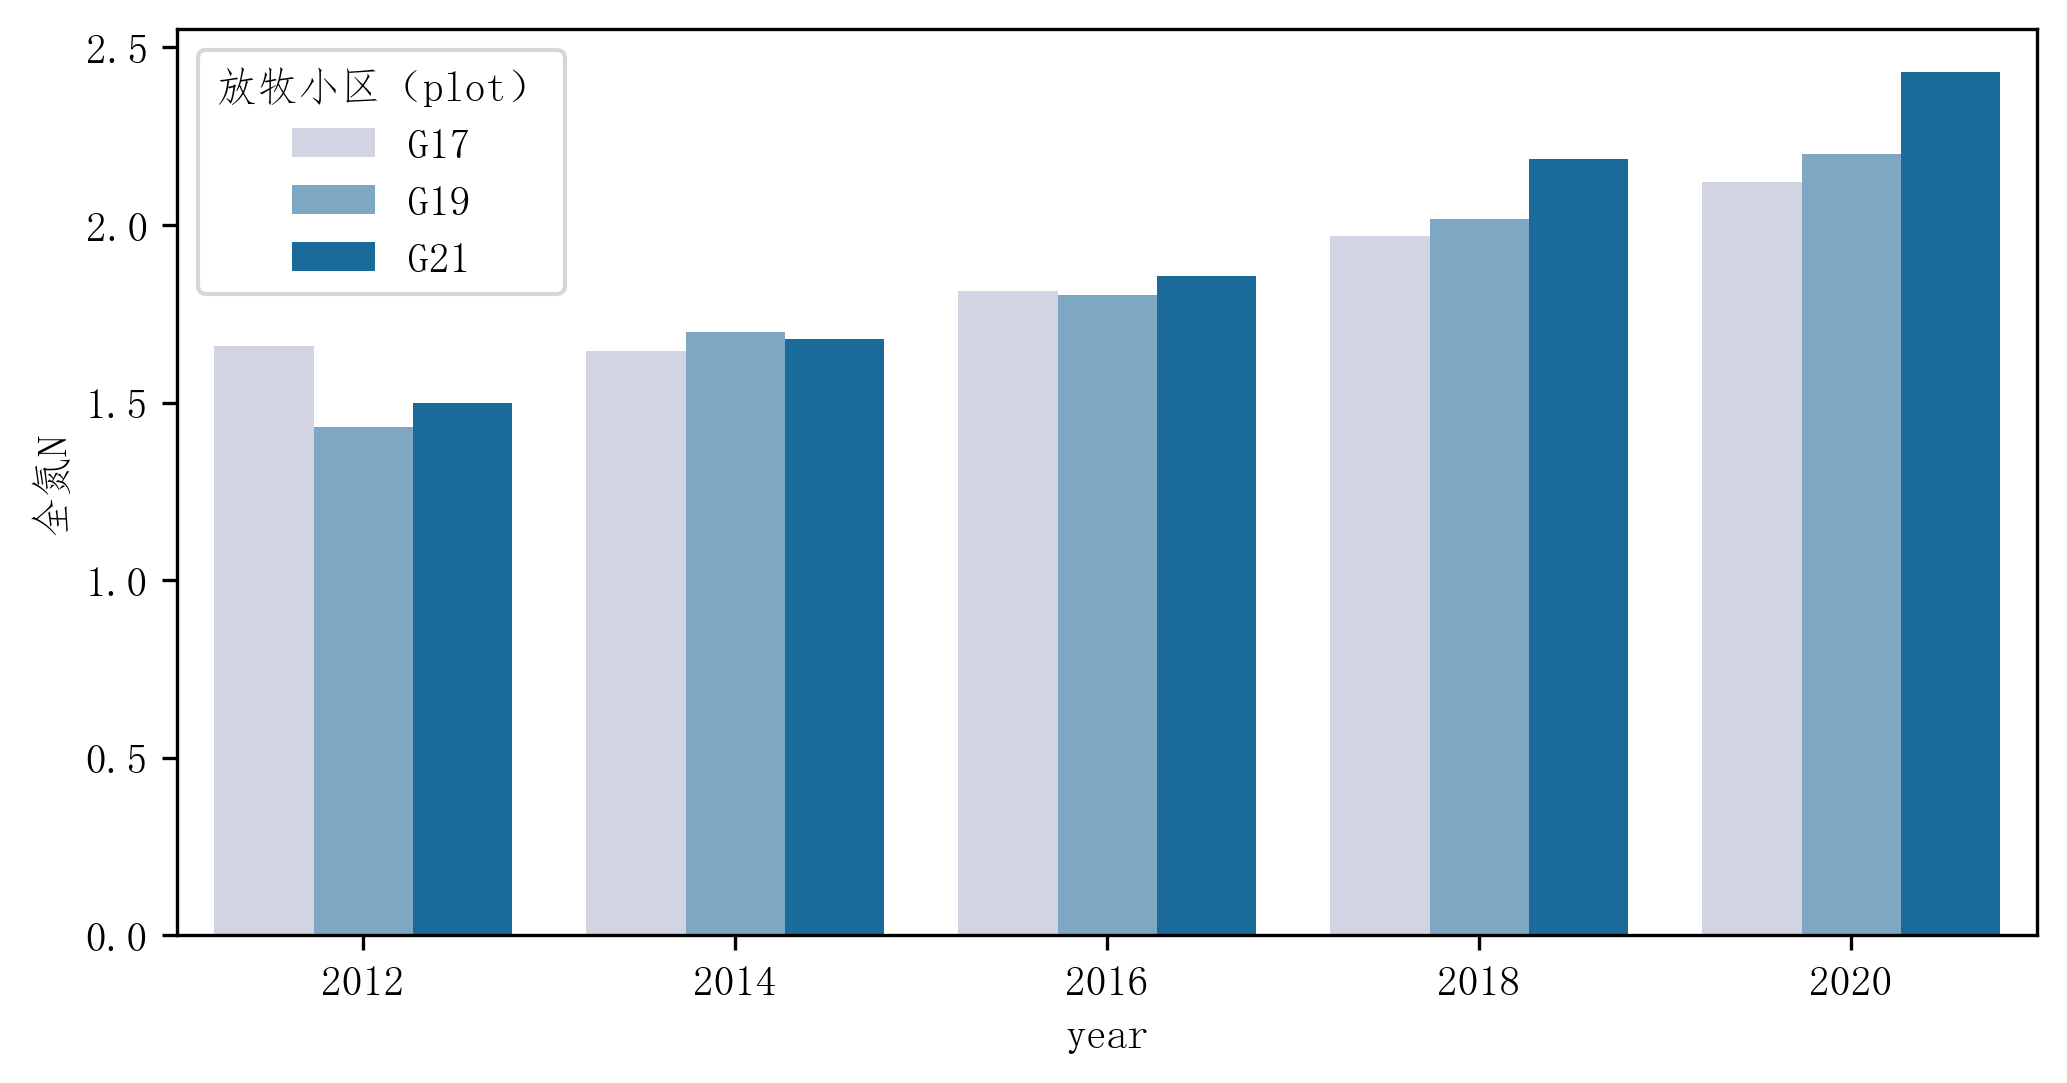

In [29]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='全氮N',hue='放牧小区（plot）',palette="PuBu",data=dfNG)
# plt.savefig('ng3.jpg',dpi=500,bbox_inches='tight')

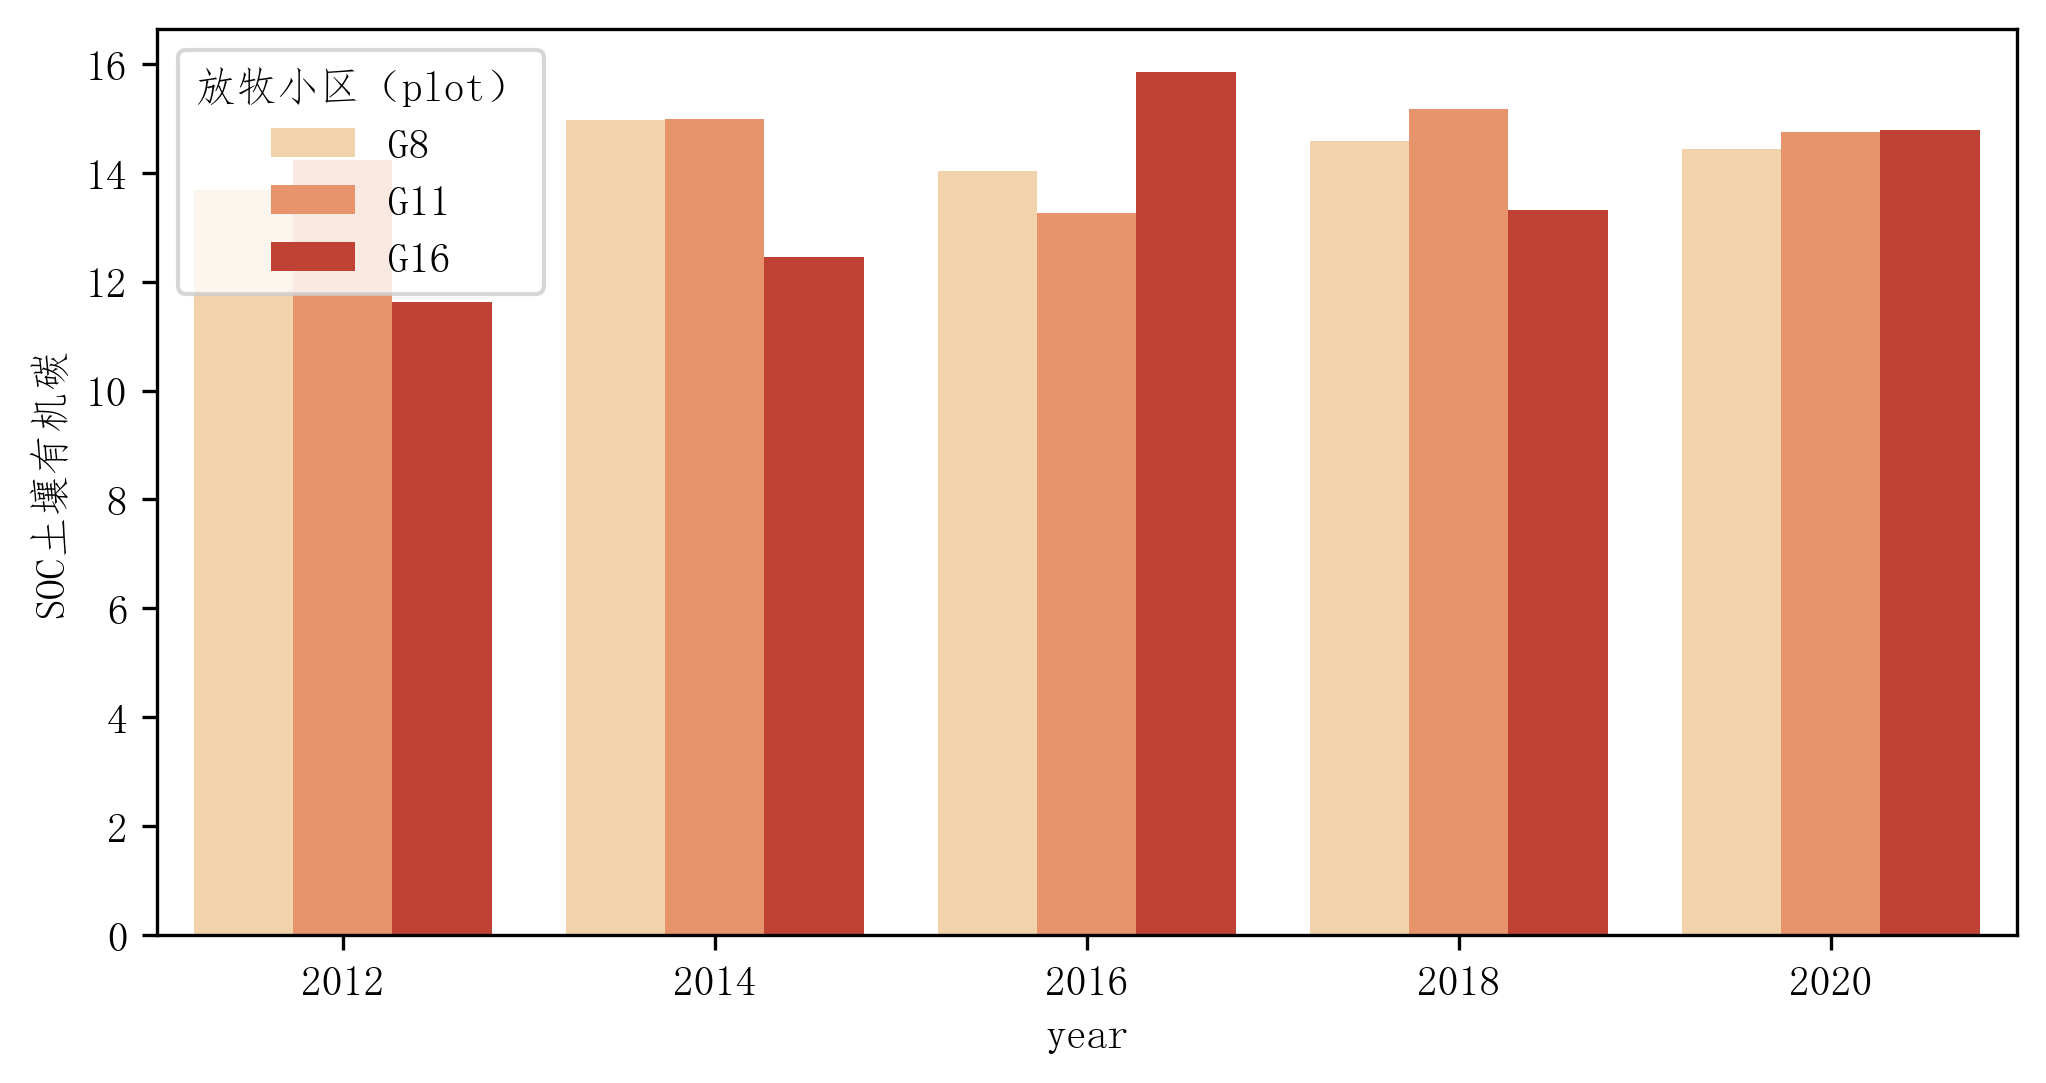

In [30]:
dfMGI = pd.read_csv('data/MGI.csv')
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SOC土壤有机碳',hue='放牧小区（plot）',palette="OrRd",data=dfMGI)
# plt.savefig('mg1.jpg',dpi=500,bbox_inches='tight')

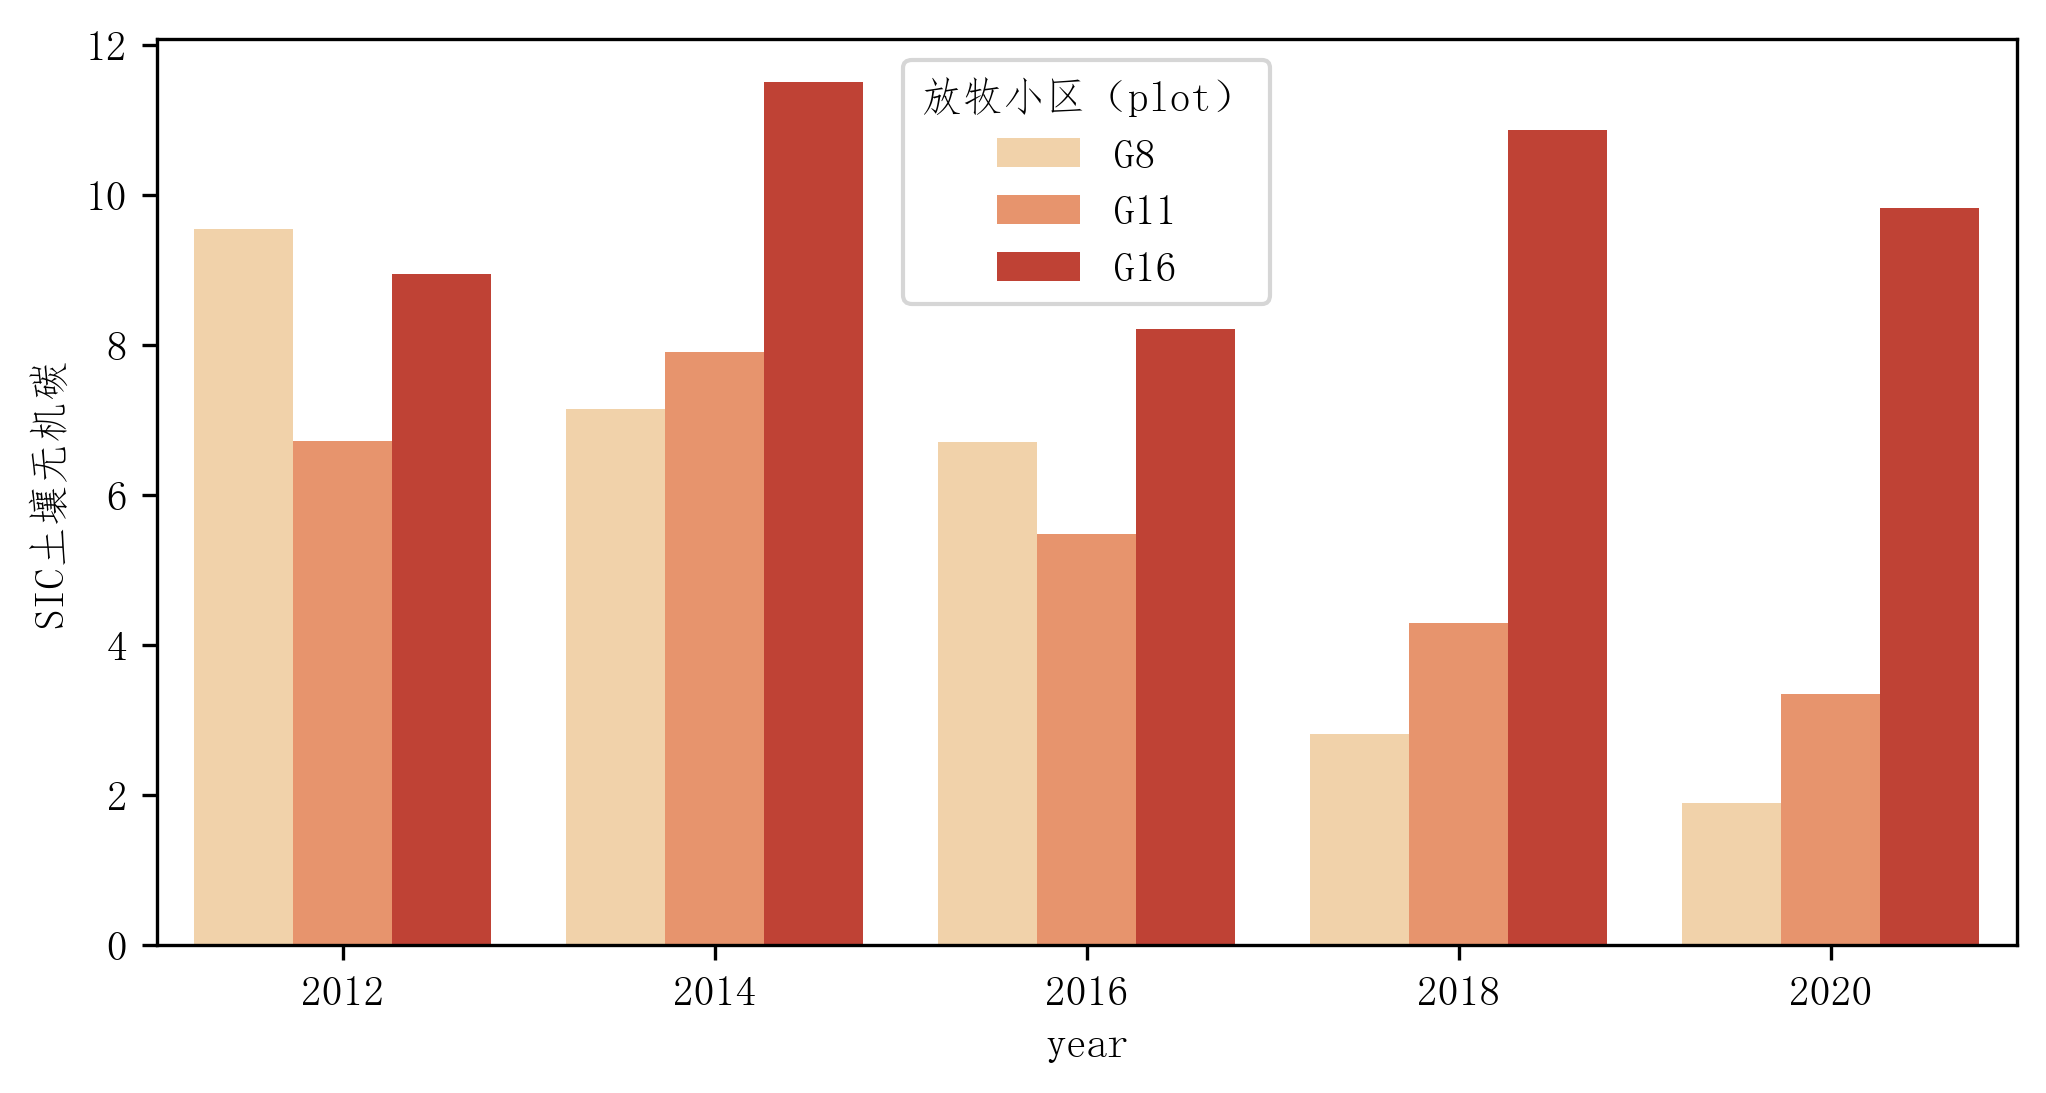

In [31]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SIC土壤无机碳',hue='放牧小区（plot）',palette="OrRd",data=dfMGI)
# plt.savefig('mg2.jpg',dpi=500,bbox_inches='tight')

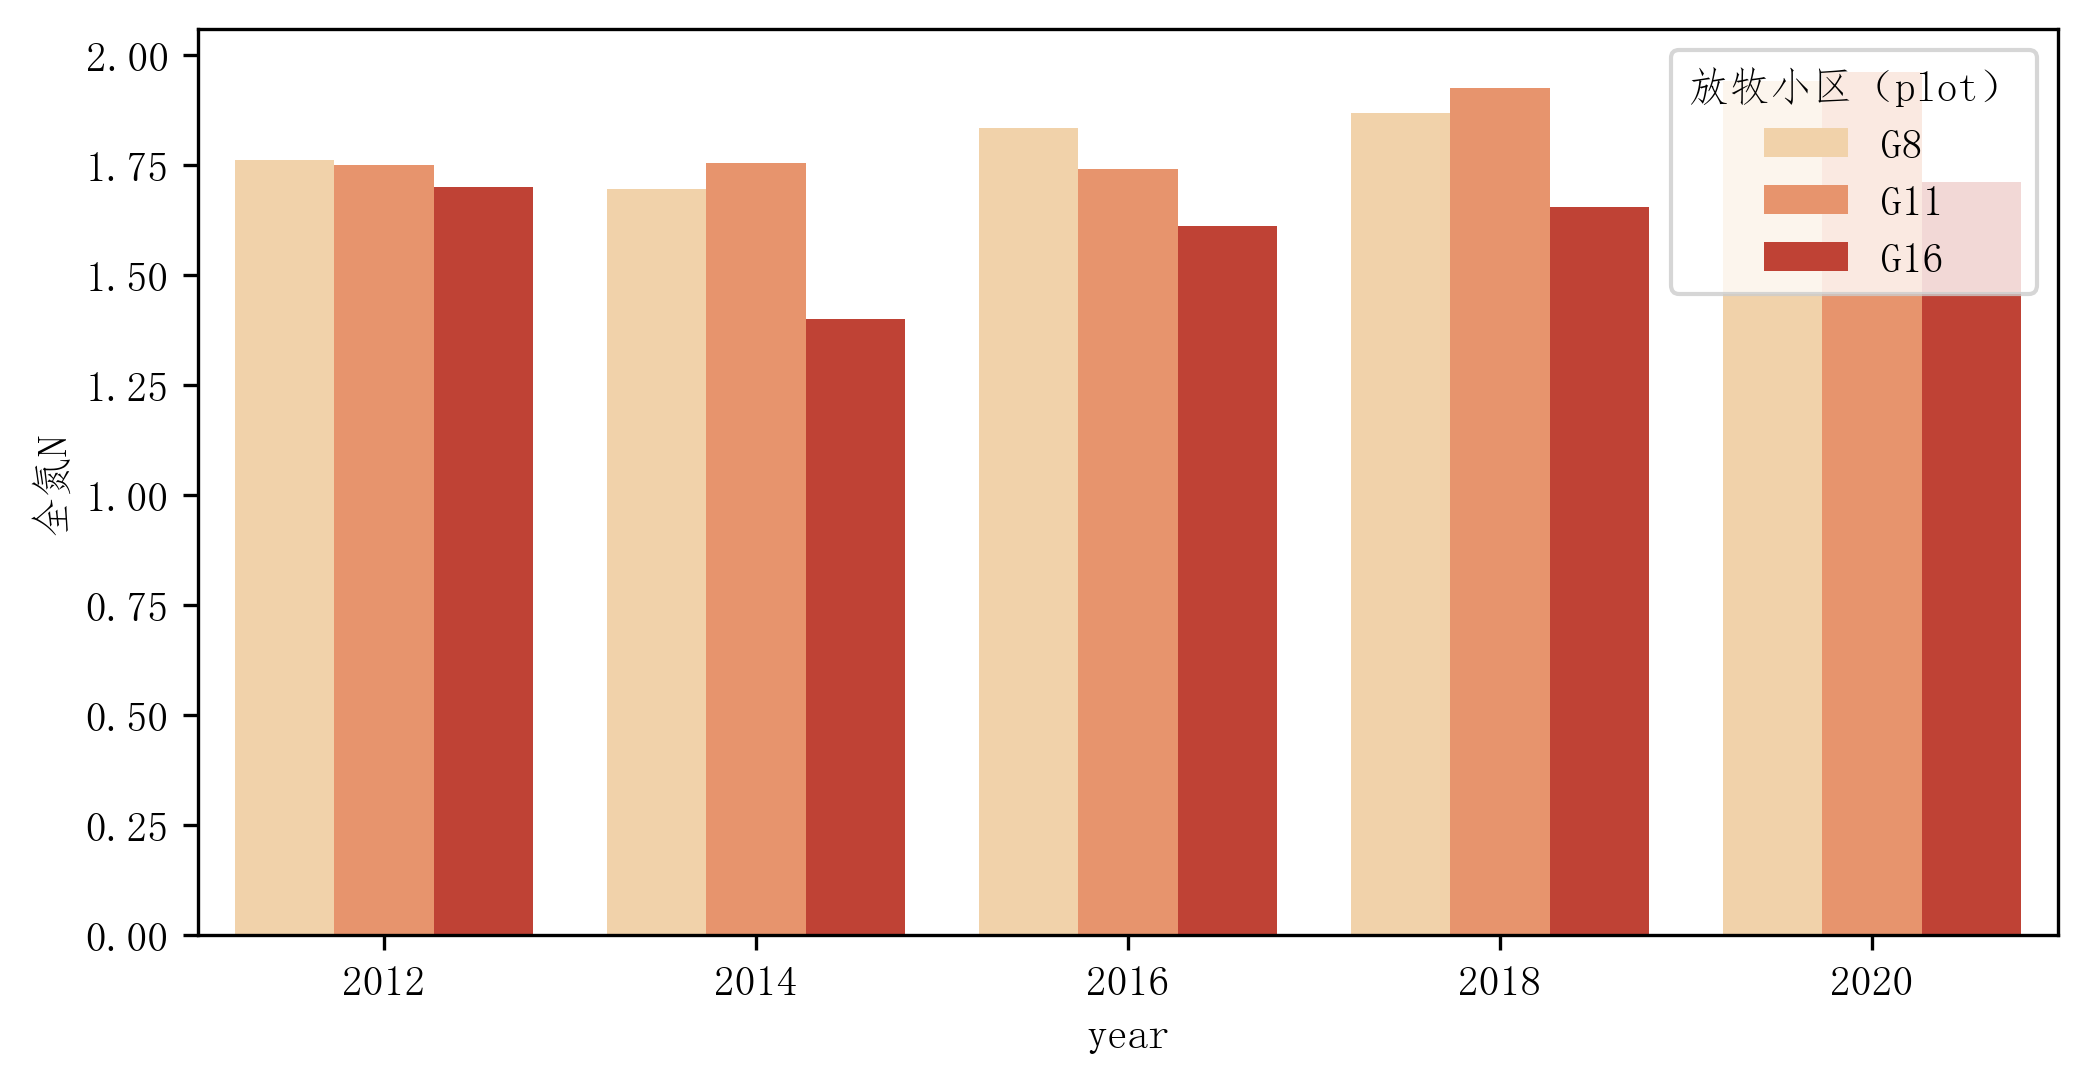

In [32]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='全氮N',hue='放牧小区（plot）',palette="OrRd",data=dfMGI)
# plt.savefig('mg3.jpg',dpi=500,bbox_inches='tight')

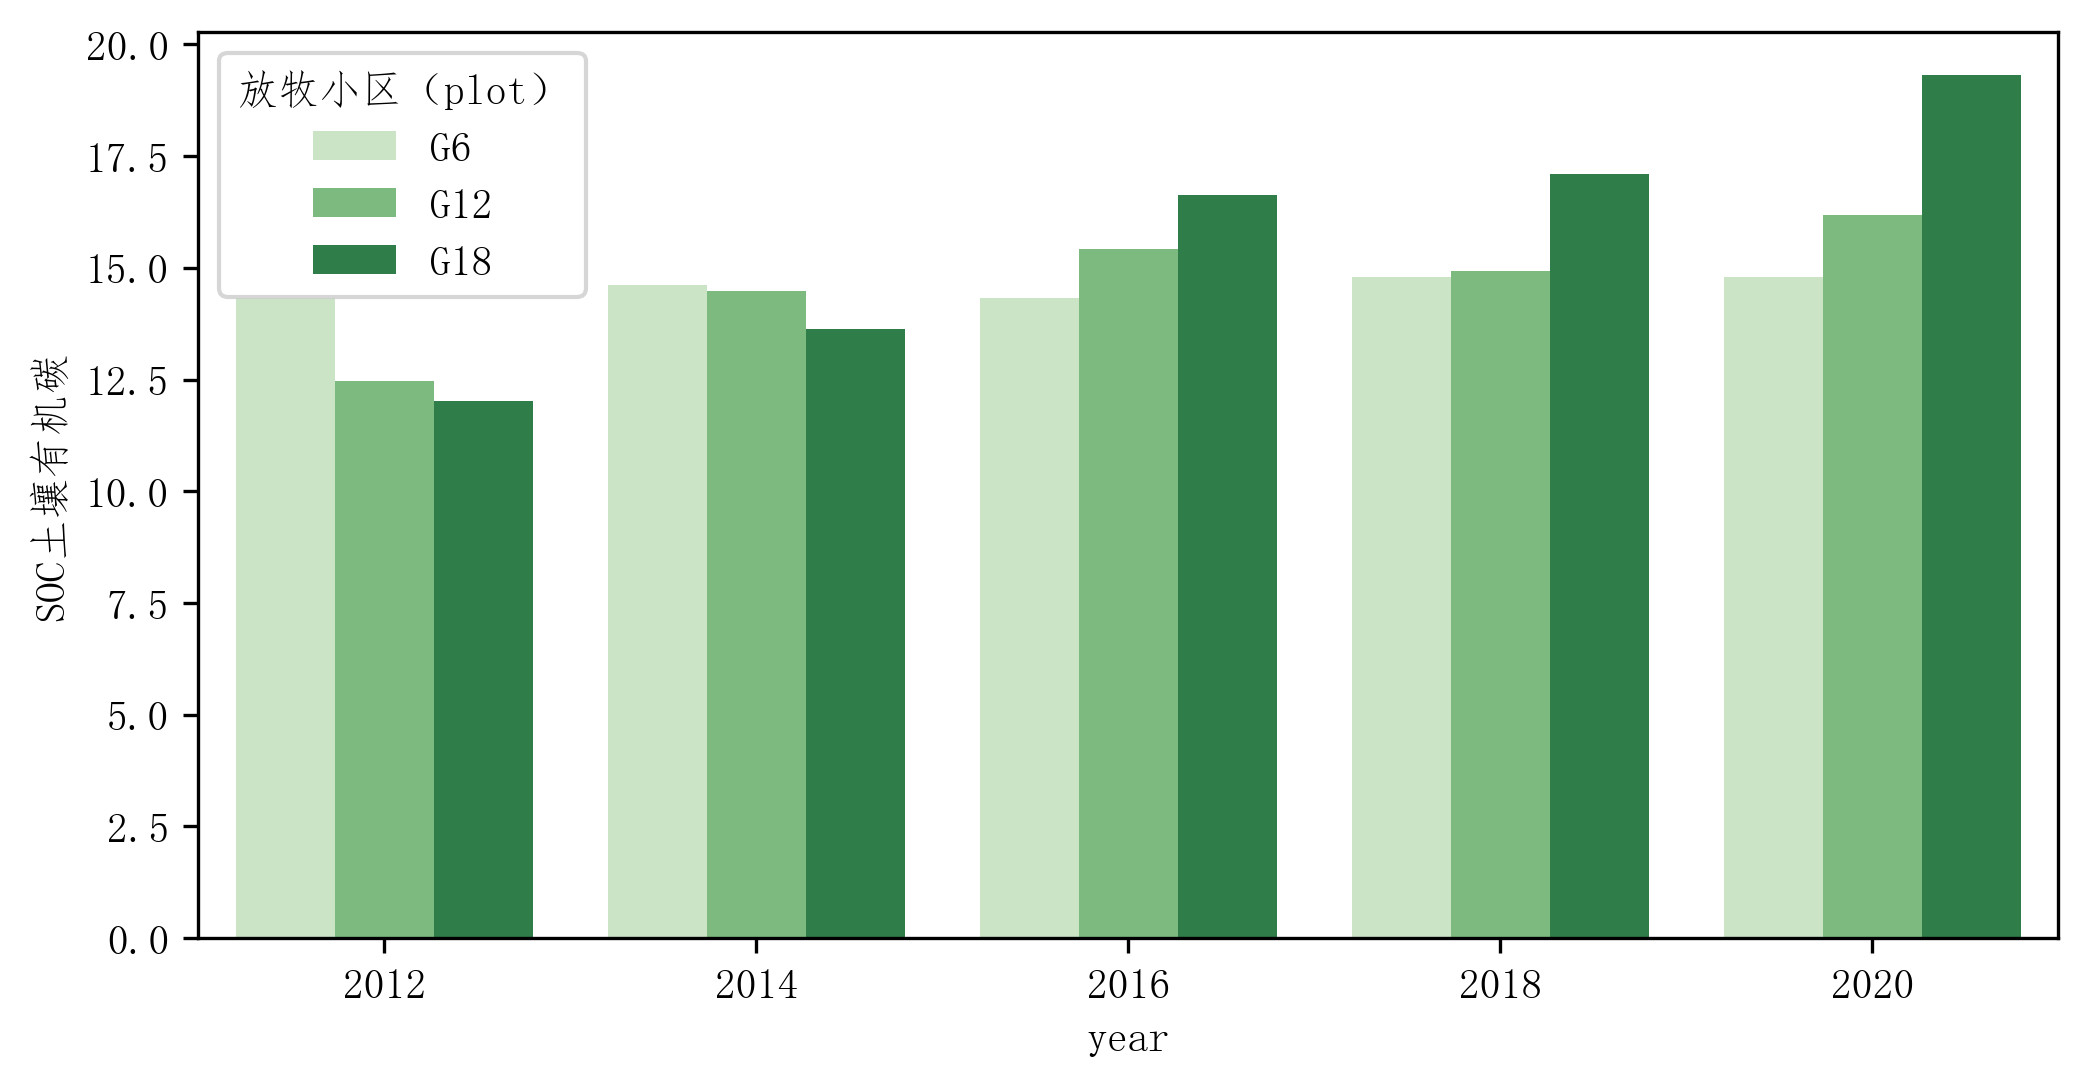

In [33]:
dfLGI = pd.read_csv('data/LGI.csv')
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SOC土壤有机碳',hue='放牧小区（plot）',palette="Greens",data=dfLGI)
# plt.savefig('lg1.jpg',dpi=500,bbox_inches='tight')

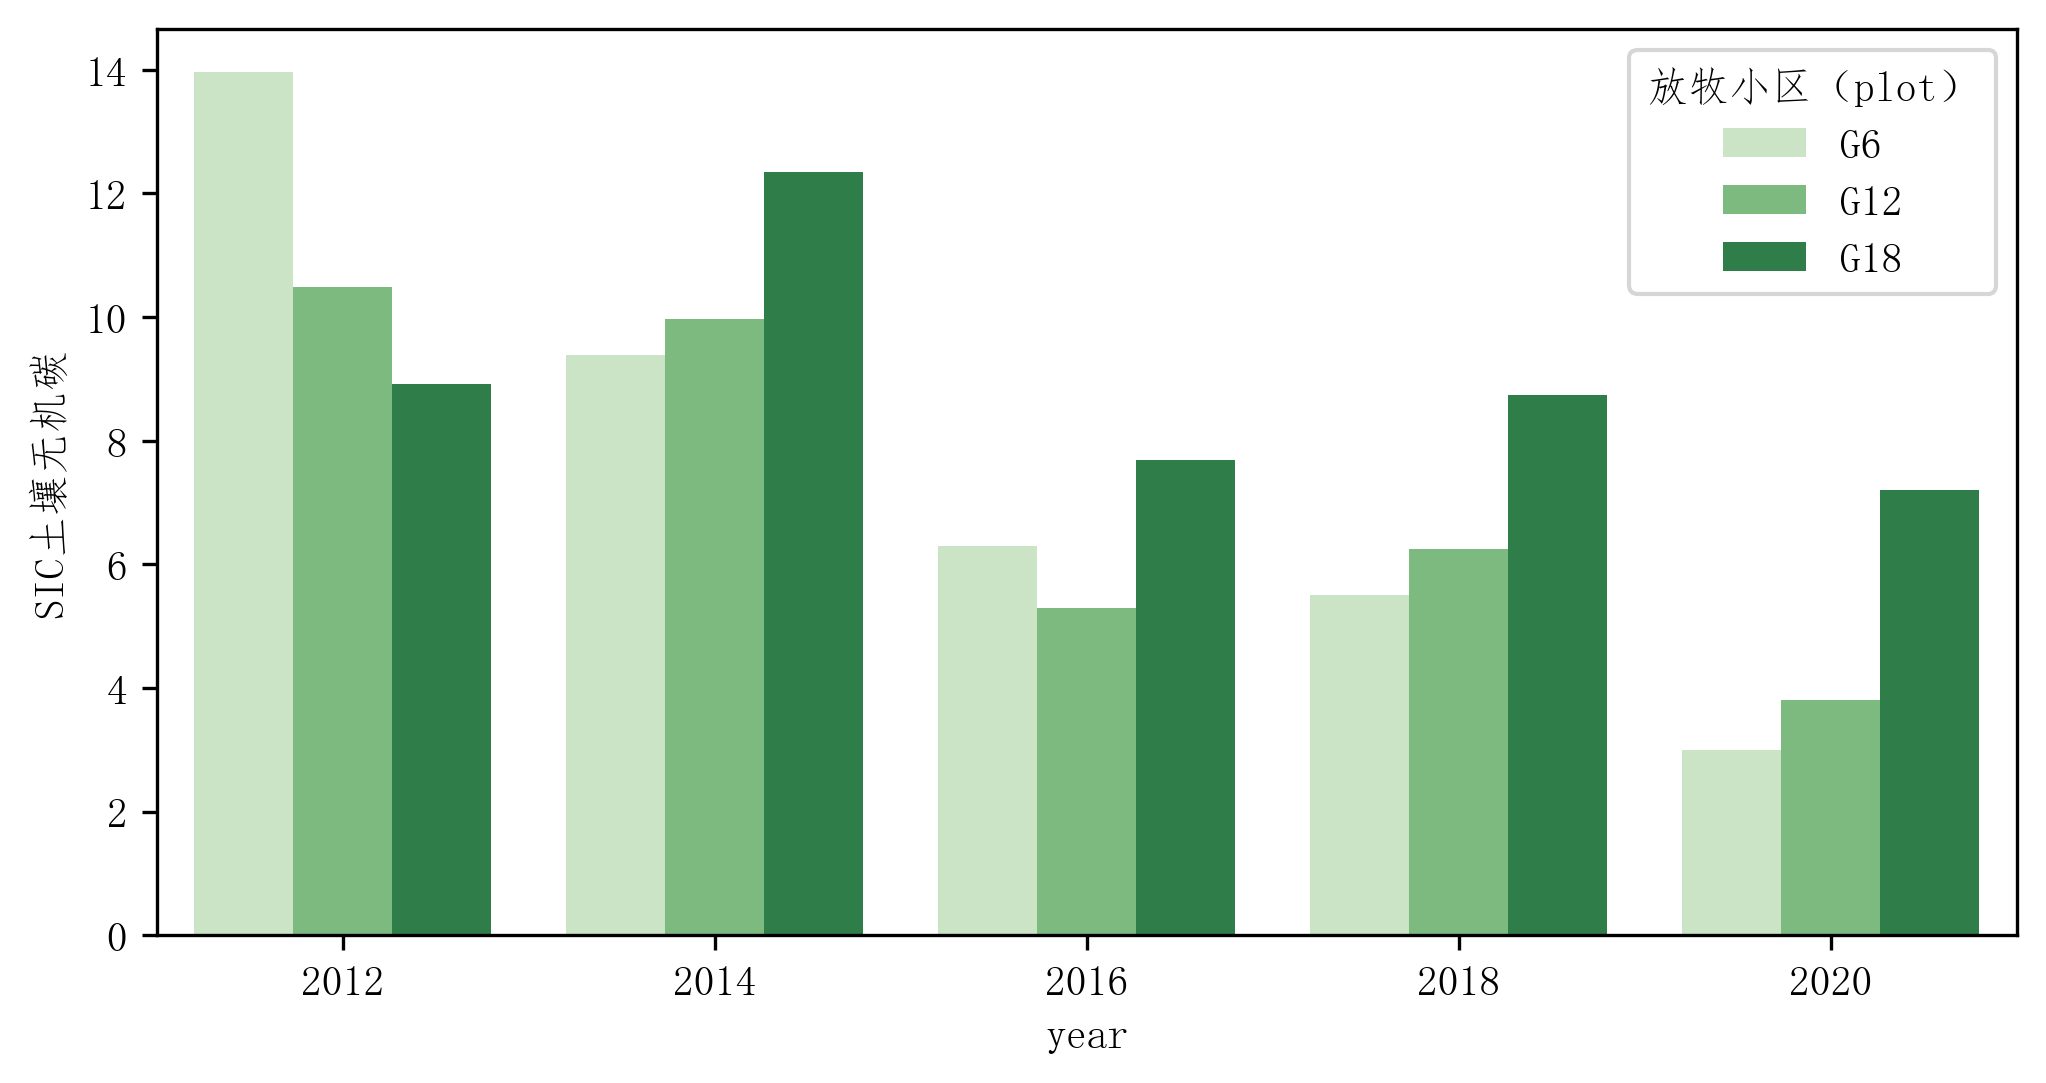

In [34]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SIC土壤无机碳',hue='放牧小区（plot）',palette="Greens",data=dfLGI)
# plt.savefig('lg2.jpg',dpi=500,bbox_inches='tight')

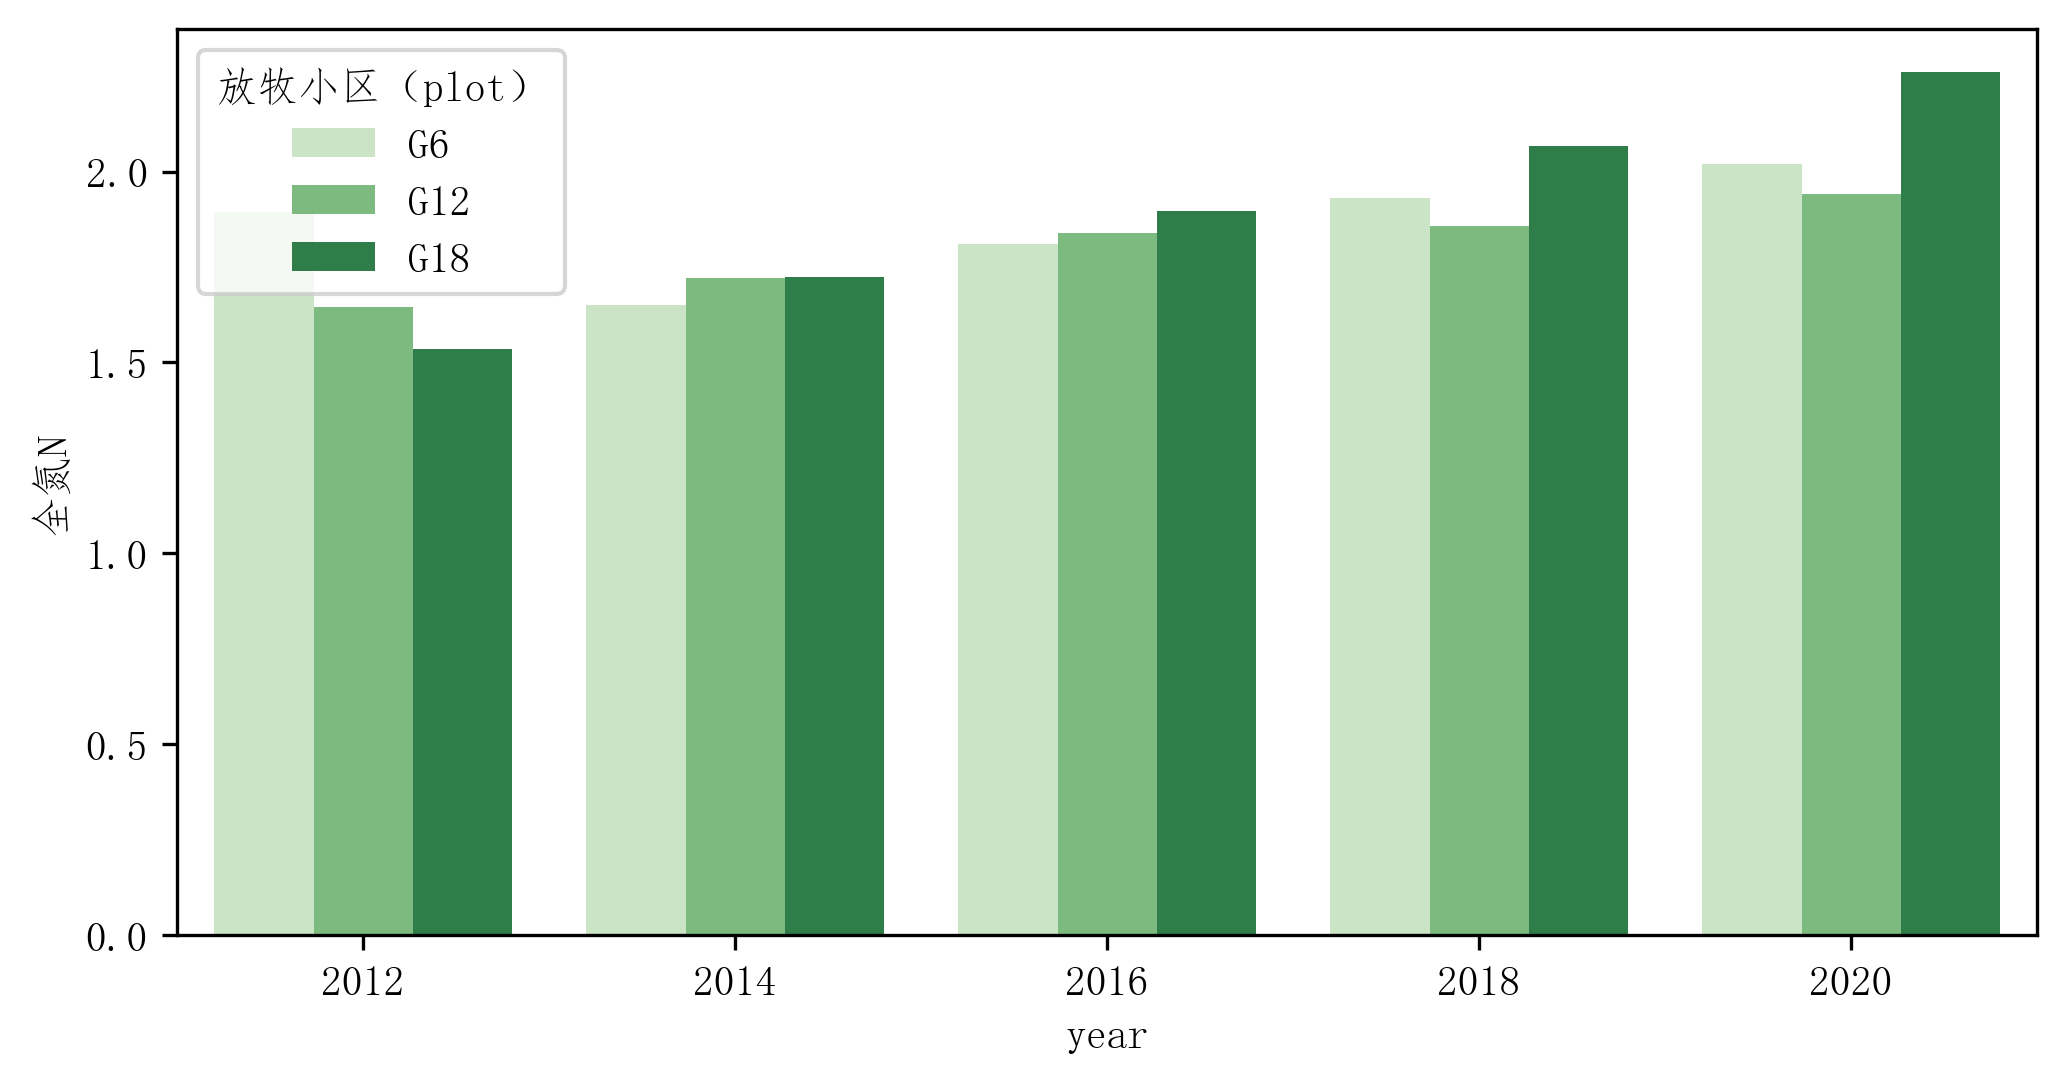

In [35]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='全氮N',hue='放牧小区（plot）',palette="Greens",data=dfLGI)
# plt.savefig('lg3.jpg',dpi=500,bbox_inches='tight')

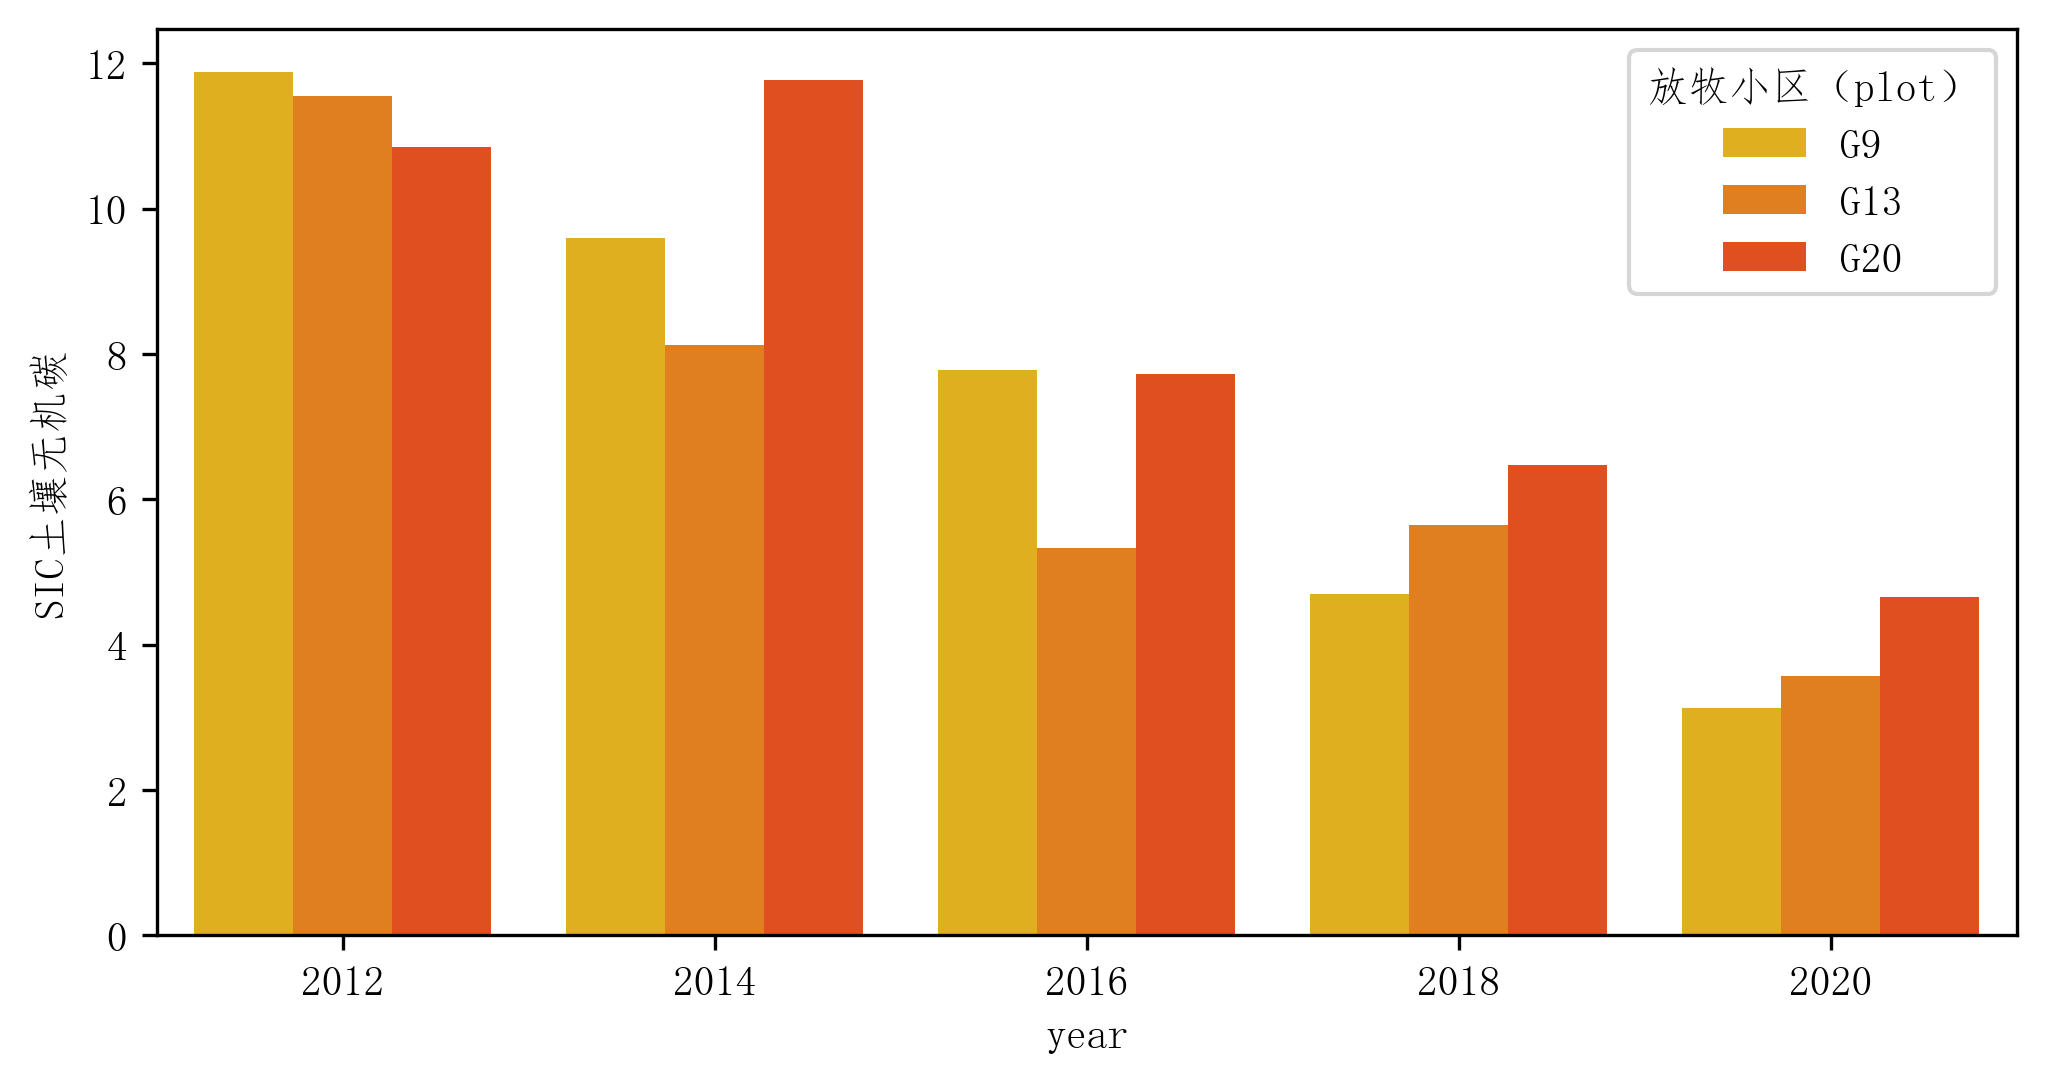

In [36]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='SIC土壤无机碳',hue='放牧小区（plot）',palette="autumn_r",data=dfHGI)
# plt.savefig('hg2.jpg',dpi=500,bbox_inches='tight')

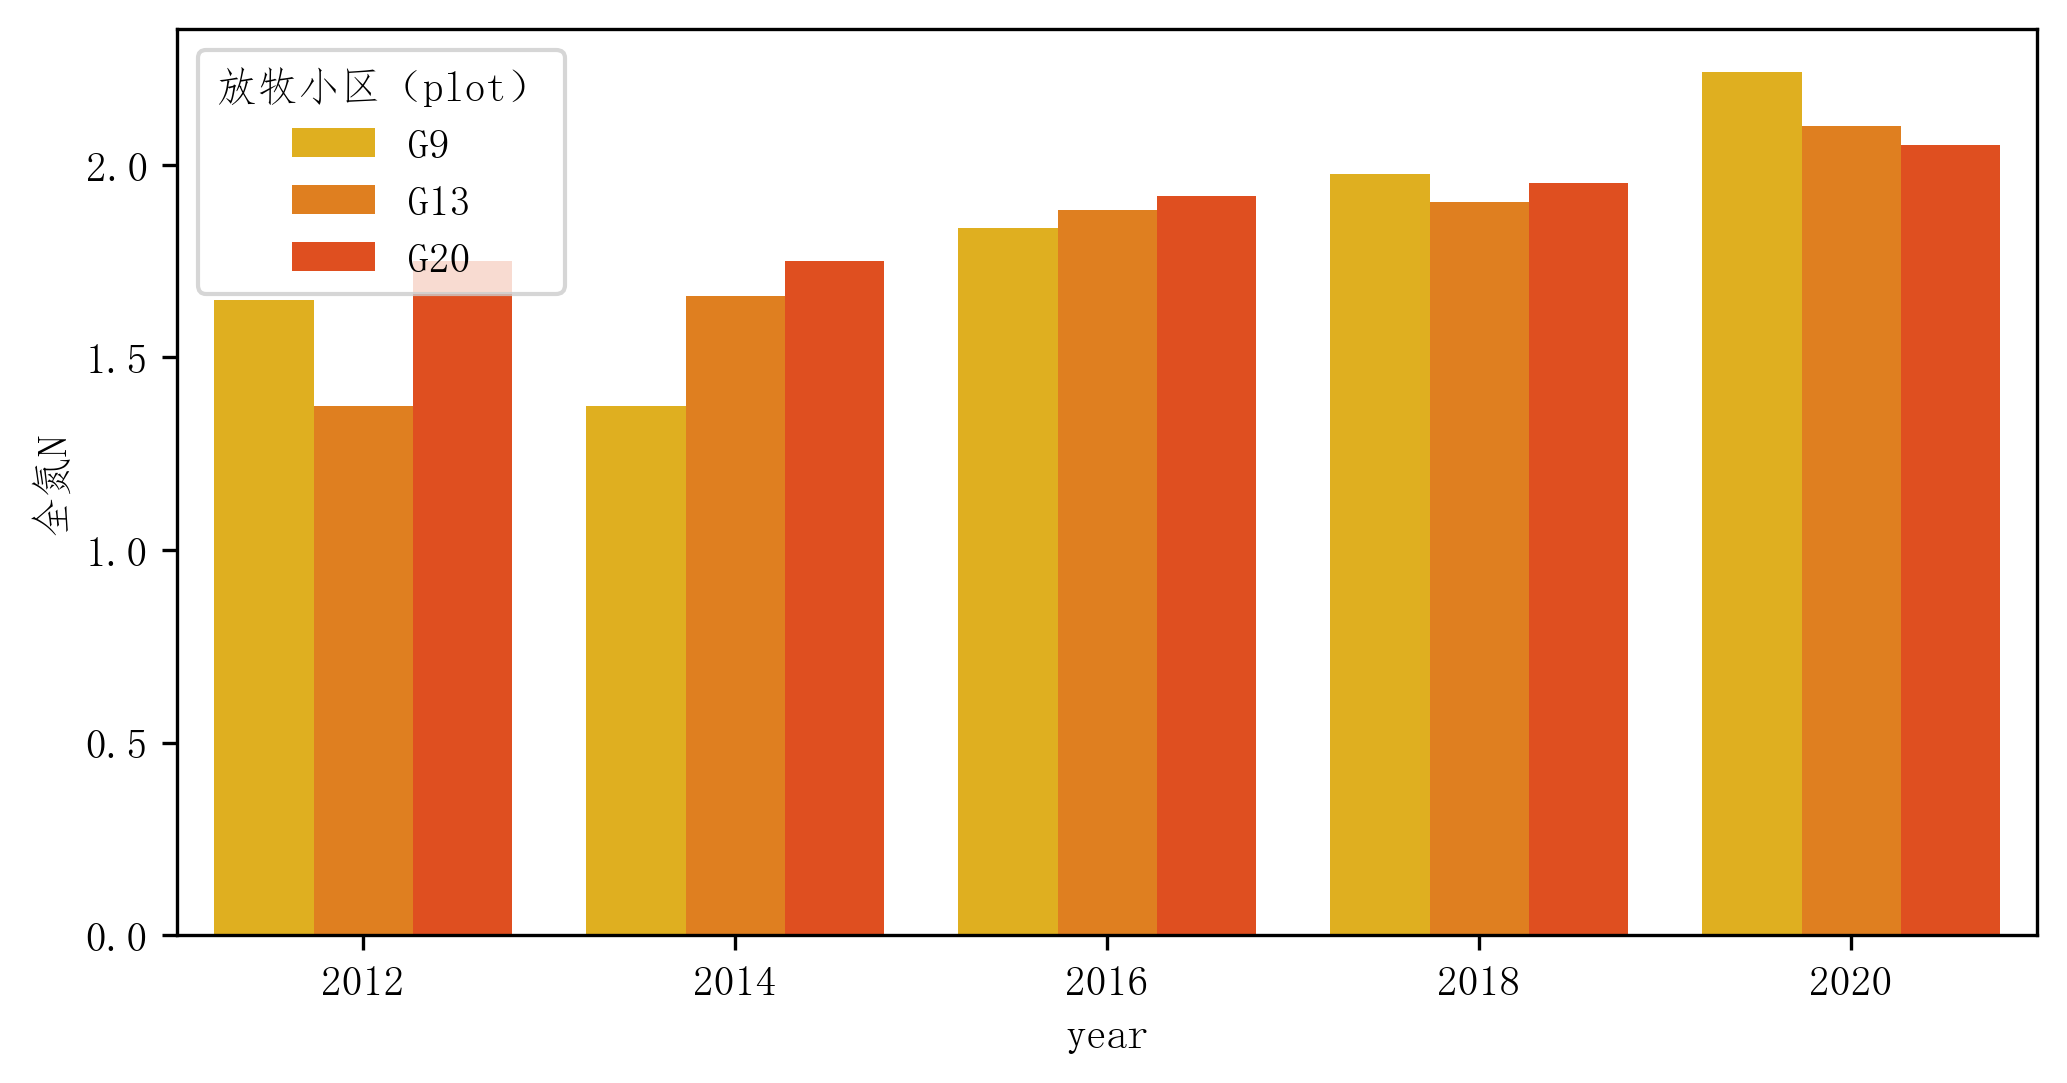

In [37]:
plt.figure(dpi=300,figsize=(8,4))
sns.barplot(x='year',y='全氮N',hue='放牧小区（plot）',palette="autumn_r",data=dfHGI)
# plt.savefig('hg3.jpg',dpi=500,bbox_inches='tight')